## Final Project Submission

Please fill out:
* Student name: Greg Osborne
* Student pace: part time
* Scheduled project review date/time: May 20th 2:00 pm CT
* Instructor name: Claude Fried
* Blog post URL: https://medium.com/@gregosborne

#    Business Case

Microsoft’s strong representation in the fields of personal computing, business computing, and interactive entertainment needs to expand into other forms of popular media to stay competitive and attract new customers. Microsoft wishes to investigate the best way to expand into the blockbuster movie industry.

To break in to this business, Microsoft faces competition from the five titans of the film industry: 
1. Walt Disney/20th Century Fox
2. Warner Brothers
3. Sony/Columbia
4. Universal Studios
5. Paramount Pictures

Microsoft commissioned Data Science firm FurPig Inc. to recommend best practices to succeed in this new initiative. 

FurPig Inc. assigned Data Scientist Greg Osborne (me) to the project.

Microsoft provided me with a zip file containing database information detailing several different characteristics from thousands of films. My job is to go through the data and make the best recommendations based on three business questions.

# Dependent Variable

There are two reasons for this initiative:
1. Make a profit on the films
2. Build a reputation with the public of quality entertainment for Microsoft’s brand 

Microsoft is not looking to create fodder for the pretentious crowd, generating buzz at film festivals and ignored by the public upon wider release. Microsoft wants its new movie brand—Working title: XBoxOffice—to be recognized by as many people as possible. 

Since this is new a initiative for Microsoft, and the whole point is getting as many people to see these films as possible, the driving metric for our analysis will be box office dollars, because that’s the metric that’s closest to ticket sales.

Our dependent variable will be box office dollars.

# Independent Variables

Microsoft contracted FurPig to select three independent variables—that is, three decisions that Microsoft would have complete control over during the selection of which films to produce—and see how changing these three variables yields different box office revenue.

How can we change these variables to make box office revenue as large as possible?

The three variables selected by FurPig are:
1. Genre
2. Release month
3. Creative Personnel (Writer, Director, Producer, Actor, Actress)

# Business Questions

Greg selected the following business questions:
1. What genres of film produce the highest box office revenue?
2. What is the best month to release a film to generate the most revenue?
3. What writers, directors, producers, actors and actresses have the highest revenue earning potential?


# Python Libraries

The first thing I'll do is import the libraries I need for this project.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import shutil
import sqlite3
import seaborn as sns
import matplotlib.patches as mpatches
pd.set_option("display.max_columns", None)

 #   Data Importation

Now, I'll import the data I was given in the zip file

In [2]:
ls zippedData

 Volume in drive C is OS
 Volume Serial Number is 4EE7-277F

 Directory of C:\Users\g_osb\Clones\Phase1\dsc-phase-1-project-v2-4\zippedData

05/19/2022  01:15 PM    <DIR>          .
06/09/2022  11:11 PM    <DIR>          ..
05/08/2022  11:01 PM            53,544 bom.movie_gross.csv.gz
05/08/2022  11:01 PM        67,149,708 im.db.zip
05/08/2022  11:01 PM           107,563 movie_data_erd.jpeg
05/08/2022  11:01 PM           498,202 rt.movie_info.tsv.gz
05/08/2022  11:01 PM         3,402,194 rt.reviews.tsv.gz
05/08/2022  11:01 PM           827,840 tmdb.movies.csv.gz
05/08/2022  11:01 PM           153,218 tn.movie_budgets.csv.gz
               7 File(s)     72,192,269 bytes
               2 Dir(s)  407,640,190,976 bytes free


I'm going to convert each csv file into a pandas database. There are five csv files to convert.

In [3]:
bom = pd.read_csv('C:/Users/g_osb/Clones/Phase1/dsc-phase-1-project-v2-4/zippedData/bom.movie_gross.csv.gz')
rt_info = pd.read_csv('C:/Users/g_osb/Clones/Phase1/dsc-phase-1-project-v2-4/zippedData/rt.movie_info.tsv.gz', delimiter='\t')
rt_reviews = pd.read_csv('C:/Users/g_osb/Clones/Phase1/dsc-phase-1-project-v2-4/zippedData/rt.reviews.tsv.gz', delimiter='\t', encoding='windows-1252')
tmdb = pd.read_csv('C:/Users/g_osb/Clones/Phase1/dsc-phase-1-project-v2-4/zippedData/tmdb.movies.csv.gz')
tn = pd.read_csv('C:/Users/g_osb/Clones/Phase1/dsc-phase-1-project-v2-4/zippedData/tn.movie_budgets.csv.gz')

The remaining zip file needs to be unzipped. It contains a a SQL file, which needs to be connected to python so I can run SQL queries.

In [4]:
#unzip the zip file
shutil.unpack_archive("C:/Users/g_osb/Clones/Phase1/dsc-phase-1-project-v2-4/zippedData/im.db.zip")

The SQL file is named im.db. Connecting it to Python

In [5]:
conn = sqlite3.connect('im.db')
cur = conn.cursor()

Next, I'll run a script that sets up printing the table names, then I'll print the table names

In [6]:
%%script sqlite3 im.db --out tables
.tables
.quit

In [7]:
#Now listing the tables
print(tables)

directors      movie_akas     movie_ratings  principals   
known_for      movie_basics   persons        writers      



I will now convert each of the SQL tables to a pandas data frame and preview the data. Then I checked each table for fully duplicated rows, and deleted the duplicates. If a table had no duplicates, I deleted the check.

In [8]:
imdb_directors = pd.read_sql("""
SELECT *
FROM directors
;
""",conn)

imdb_directors.drop(imdb_directors[imdb_directors.duplicated()].index, inplace=True)
imdb_directors

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
4,tt0878654,nm0089502
5,tt0878654,nm2291498
...,...,...
291169,tt8999974,nm10122357
291170,tt9001390,nm6711477
291171,tt9001494,nm10123242
291172,tt9001494,nm10123248


In [9]:
imdb_movie_akas = pd.read_sql("""
SELECT *
FROM movie_akas
;
""",conn)
imdb_movie_akas

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,None,None,original,None,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,None,0.0
331700,tt9880178,1,La atención,None,None,original,None,1.0
331701,tt9880178,2,La atención,ES,None,None,None,0.0


In [10]:
imdb_movie_ratings = pd.read_sql("""
SELECT *
FROM movie_ratings
;
""",conn)
imdb_movie_ratings

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [11]:
imdb_principals = pd.read_sql("""
SELECT *
FROM principals
;
""",conn)
imdb_principals

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"
...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,None,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,None,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,None,None
1028184,tt9692684,4,nm6009913,writer,writer,None


In [12]:
imdb_known_for = pd.read_sql("""
SELECT *
FROM known_for
;
""",conn)
imdb_known_for

,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534
...,...,...
1638255,nm9990690,tt9090932
1638256,nm9990690,tt8737130
1638257,nm9991320,tt8734436
1638258,nm9991320,tt9615610


In [13]:
imdb_movie_basics = pd.read_sql("""
SELECT *
FROM movie_basics
;
""",conn)
imdb_movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [14]:
imdb_persons = pd.read_sql("""
SELECT *
FROM persons
;
""",conn)
imdb_persons

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"
...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress
606644,nm9990690,Joo Yeon So,NaN,NaN,actress
606645,nm9991320,Madeline Smith,NaN,NaN,actress
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer


In [15]:
imdb_writers = pd.read_sql("""
SELECT *
FROM writers
;
""",conn)

#This had a lot of fully identical duplicated rows, so I deleted them.
imdb_writers.drop(imdb_writers[imdb_writers.duplicated()].index, inplace=True)
imdb_writers

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087
...,...,...
255868,tt8999892,nm10122246
255869,tt8999974,nm10122357
255870,tt9001390,nm6711477
255871,tt9004986,nm4993825


# A personal test of the provided database

As a fun exercise, I decided to look for Sanford Gibbons, my friend's Uncle.

In [16]:
pd.read_sql("""
SELECT *
FROM persons
WHERE primary_name LIKE '%Gibbons%';
""",conn)

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0316584,Patrick D. Gibbons,NaN,NaN,"assistant_director,producer,miscellaneous"
1,nm0316554,Greg Gibbons,NaN,NaN,"animation_department,visual_effects,art_director"
2,nm0316596,Sanford Gibbons,1933.0,2018.0,actor
3,nm1733301,Dave Gibbons,1949.0,NaN,"writer,art_department,producer"
4,nm0316531,Billy Gibbons,1949.0,NaN,"soundtrack,actor,composer"
5,nm2524514,Matt Gibbons,NaN,NaN,"actor,writer,director"
6,nm1644817,Tyler Gibbons,NaN,NaN,"composer,sound_department,soundtrack"
7,nm3453179,Pete Gibbons,NaN,NaN,producer
8,nm1668151,Neil Gibbons,NaN,NaN,"writer,producer,director"
9,nm2971362,Tony Gibbons,1983.0,NaN,actor


Sure enough, Sanford's person_id is nm0316596. Let's see what films Sanford Gibbons has listed in this database.

In [17]:
pd.read_sql("""
SELECT *
FROM principals
JOIN movie_basics
    USING(movie_id)
WHERE person_id LIKE 'nm0316596';
""",conn)

,movie_id,ordering,person_id,category,job,characters,primary_title,original_title,start_year,runtime_minutes,genres
0,tt5607782,4,nm0316596,actor,None,"[""Father James Burk""]",The Covenant,The Covenant,2017,90.0,Horror


# Data Cleaning / Merging of tables

After previewing all the data provided, I decided on these three business questions (printed above):

1. What genres of film produce the highest box office revenue?
2. What is the best month to release a film in to generate the most revenue?
3. What writers, directors, producers, actors and actresses have the highest revenue earning potential?

For these three questions, I don't need to utilize the information from Rotten Tomatoes. That database does not have any movie titles that can be matched to the other databases. It is primarily internet user film ratings, which is not being considered by my three business questions.

Instead, I will join the remaining four databases together: Box Office Mojo, IMDB, The Numbers, and The Movie Database. I will only keep the films that exist in each database provided. First, I'll start with merging Box Office Mojo and the Internet Movie Database.

After reviewing the data, I found a strange mistake in Box Office Mojo's date for a 2012 movie titled Upside Down. It's date is listed 2013. This caused the data to be inconsistent with other databases. I could just delete it, but, after finding the error, it's just as easy to correct it.

In [18]:
bom.at[1298,'year'] = 2012
bom.iloc[1298]['year']

2012

In [19]:
#Merging bom and imdb
movies_analyzed = pd.merge(bom,imdb_movie_basics, how='inner',left_on='title', right_on='original_title')
movies_analyzed

,title,studio,domestic_gross,foreign_gross,year,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy"
1,Inception,WB,292600000.0,535700000,2010,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi"
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,tt0892791,Shrek Forever After,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy"
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,tt1325004,The Twilight Saga: Eclipse,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy"
4,Iron Man 2,Par.,312400000.0,311500000,2010,tt1228705,Iron Man 2,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...,...,...,...,...,...,...
2771,The Escape,IFC,14000.0,NaN,2018,tt6069126,The Escape,The Escape,2017,101.0,Drama
2772,Souvenir,Strand,11400.0,NaN,2018,tt2387692,Souvenir,Souvenir,2016,90.0,"Drama,Music,Romance"
2773,Souvenir,Strand,11400.0,NaN,2018,tt2389092,Souvenir,Souvenir,2014,86.0,"Comedy,Romance"
2774,Souvenir,Strand,11400.0,NaN,2018,tt3478898,Souvenir,Souvenir,2014,86.0,Documentary


I will review the merged data.

In [20]:
movies_analyzed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2776 entries, 0 to 2775
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            2776 non-null   object 
 1   studio           2773 non-null   object 
 2   domestic_gross   2756 non-null   float64
 3   foreign_gross    1778 non-null   object 
 4   year             2776 non-null   int64  
 5   movie_id         2776 non-null   object 
 6   primary_title    2776 non-null   object 
 7   original_title   2776 non-null   object 
 8   start_year       2776 non-null   int64  
 9   runtime_minutes  2610 non-null   float64
 10  genres           2740 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 260.2+ KB


I will check for inconsistent debut year information between these two database and drop any films that do not match between the databases.

In [21]:
#I need to review all these films
pd.set_option("display.max_rows", None, "display.max_columns", None)

movies_to_drop = movies_analyzed[movies_analyzed['title'].duplicated()]
movies_to_drop.drop(movies_to_drop[(movies_to_drop['year'] == movies_to_drop['start_year'])].index, inplace=True)
movies_to_drop[['title','studio','year','primary_title','movie_id','start_year','runtime_minutes']]

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,title,studio,year,primary_title,movie_id,start_year,runtime_minutes
15,Robin Hood,Uni.,2010,Robin Hood,tt2363363,2013,92.0
16,Robin Hood,Uni.,2010,Robin Hood,tt4532826,2018,116.0
17,Robin Hood,Uni.,2010,Robin Hood,tt6858500,2018,NaN
18,Robin Hood,Uni.,2010,Robin Hood,tt8558276,2017,60.0
37,Red,Sum.,2010,Red,tt2294785,2012,26.0
38,Red,Sum.,2010,Red,tt4136848,2014,82.0
39,Red,Sum.,2010,Red,tt4170206,2014,107.0
40,Red,Sum.,2010,Red,tt8851190,2018,90.0
45,Unstoppable,Fox,2010,Unstoppable,tt2951338,2015,53.0
46,Unstoppable,Fox,2010,Unstoppable,tt3070502,2013,65.0


It's clear that IMDB has a much more exhaustive that the BOM database. The list above shows repeated BOM data on the left side matched to multiple movies from IMDB on the right based on the fact that they have the same title. However, we need to drop these because they are clearly not the same films, as the release years differ, IMDB has multiple entries in their identifier, the movie_id column, and the run_time minutes differ, but they are all listed as the same movie under BOM.

It's worth noting that most of these films are still matched, however, they are matched to matching films. The BOM data is not lost.

I will move forward with the drop.

In [22]:
#Resetting row maximum
pd.set_option("display.max_rows", 30, "display.max_columns", None)

#Dropping the incorrect matches.
movies_analyzed.drop(movies_to_drop.index, inplace=True)
movies_analyzed.drop(movies_analyzed[(movies_analyzed['year'] != movies_analyzed['start_year'])].index, inplace=True)
bom_and_imdb = movies_analyzed.reset_index()
movies_analyzed

,title,studio,domestic_gross,foreign_gross,year,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy"
1,Inception,WB,292600000.0,535700000,2010,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi"
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,tt0892791,Shrek Forever After,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy"
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,tt1325004,The Twilight Saga: Eclipse,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy"
4,Iron Man 2,Par.,312400000.0,311500000,2010,tt1228705,Iron Man 2,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...,...,...,...,...,...,...
2756,The House That Jack Built,IFC,88000.0,NaN,2018,tt4003440,The House That Jack Built,The House That Jack Built,2018,152.0,"Crime,Drama,Horror"
2761,Helicopter Eela,Eros,72000.0,NaN,2018,tt8427036,Helicopter Eela,Helicopter Eela,2018,135.0,Drama
2765,Oolong Courtyard,CL,37700.0,NaN,2018,tt8549902,Oolong Courtyard: KungFu School,Oolong Courtyard,2018,103.0,Comedy
2768,The Workshop,Strand,22100.0,NaN,2018,tt7405478,The Workshop,The Workshop,2018,80.0,Thriller


I'm now going to merge in The Movie Database columns. To do that, I need to rename some of the columns so I can tell where each column came from after the merge.

In [23]:
tmdb.rename(columns = {'Unnamed: 0':'tmdb_index','original_title':'tmdb_original_title','title':'tmdb_title', 'id': 'tmdb_id', 'release_date':'tmdb_release_date'},inplace=True)

Now I have to fix another error in the film Upside Down.

In [24]:
tmdb.at[7969,'tmdb_release_date'] = '2012-08-31'

Now I'm going convert the release dates to release years, in integers, in a new column. This will allow me to merge and compare with the IMDB and Box Office Mojo data.

In [25]:
tmdb['tmdb_year'] = tmdb['tmdb_release_date'].map(lambda x : x[0:4])
tmdb['tmdb_year'] = tmdb['tmdb_year'].astype(int)

Merging the previously merged dataframe of IMDB and Box Office Mojo data with the tmdb dataframe. I'll now refer to this database as movies_analyzed.

In [26]:
movies_analyzed = pd.merge(bom_and_imdb,tmdb, how='inner',left_on='title', right_on='tmdb_title')
movies_analyzed

,index,title,studio,domestic_gross,foreign_gross,year,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,tmdb_index,genre_ids,tmdb_id,original_language,tmdb_original_title,popularity,tmdb_release_date,tmdb_title,vote_average,vote_count,tmdb_year
0,0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340,2010
1,1,Inception,WB,292600000.0,535700000,2010,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,2010
2,2,Shrek Forever After,P/DW,238700000.0,513900000,2010,tt0892791,Shrek Forever After,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy",38,"[35, 12, 14, 16, 10751]",10192,en,Shrek Forever After,15.041,2010-05-16,Shrek Forever After,6.1,3843,2010
3,3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,tt1325004,The Twilight Saga: Eclipse,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy",15,"[12, 14, 18, 10749]",24021,en,The Twilight Saga: Eclipse,20.340,2010-06-23,The Twilight Saga: Eclipse,6.0,4909,2010
4,4,Iron Man 2,Par.,312400000.0,311500000,2010,tt1228705,Iron Man 2,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi",2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1770,2739,The Guardians,MBox,177000.0,NaN,2018,tt8150132,The Guardians,The Guardians,2018,70.0,Documentary,5670,"[18, 28, 53, 80]",130747,de,Schutzengel,4.795,2012-10-10,The Guardians,6.0,55,2012
1771,2742,Museo,Vita.,149000.0,NaN,2018,tt4958448,Museo,Museo,2018,128.0,"Crime,Drama",24760,"[80, 18]",477654,es,Museo,4.819,2018-09-14,Museo,6.5,37,2018
1772,2756,The House That Jack Built,IFC,88000.0,NaN,2018,tt4003440,The House That Jack Built,The House That Jack Built,2018,152.0,"Crime,Drama,Horror",15469,"[10751, 18, 80]",199999,en,The House That Jack Built,1.532,2015-12-11,The House That Jack Built,5.3,4,2015
1773,2756,The House That Jack Built,IFC,88000.0,NaN,2018,tt4003440,The House That Jack Built,The House That Jack Built,2018,152.0,"Crime,Drama,Horror",23926,"[18, 27, 80, 53]",398173,en,The House That Jack Built,17.556,2018-11-28,The House That Jack Built,7.3,752,2018


I will review the merged data.

In [27]:
movies_analyzed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1775 entries, 0 to 1774
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                1775 non-null   int64  
 1   title                1775 non-null   object 
 2   studio               1775 non-null   object 
 3   domestic_gross       1767 non-null   float64
 4   foreign_gross        1344 non-null   object 
 5   year                 1775 non-null   int64  
 6   movie_id             1775 non-null   object 
 7   primary_title        1775 non-null   object 
 8   original_title       1775 non-null   object 
 9   start_year           1775 non-null   int64  
 10  runtime_minutes      1762 non-null   float64
 11  genres               1773 non-null   object 
 12  tmdb_index           1775 non-null   int64  
 13  genre_ids            1775 non-null   object 
 14  tmdb_id              1775 non-null   int64  
 15  original_language    1775 non-null   o

Once again, I will check for inconsistent debut year information and drop any films with mistakes.

In [28]:
#I need to review all these films
pd.set_option("display.max_rows", None, "display.max_columns", None)

movies_to_drop = movies_analyzed[movies_analyzed['title'].duplicated()]
movies_to_drop.drop(movies_to_drop[(movies_to_drop['year'] == movies_to_drop['tmdb_year'])].index, inplace=True)
movies_to_drop[['primary_title','movie_id','start_year','runtime_minutes','tmdb_title','tmdb_year']]

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,primary_title,movie_id,start_year,runtime_minutes,tmdb_title,tmdb_year
15,Robin Hood,tt0955308,2010,140.0,Robin Hood,2013
16,Robin Hood,tt0955308,2010,140.0,Robin Hood,2018
22,Salt,tt0944835,2010,100.0,Salt,2012
39,Unstoppable,tt0477080,2010,98.0,Unstoppable,2013
65,Edge of Darkness,tt1226273,2010,117.0,Edge of Darkness,2015
102,Leap Year,tt1216492,2010,100.0,Leap Year,2011
107,Let Me In,tt1228987,2010,116.0,Let Me In,2016
113,Another Year,tt1431181,2010,129.0,Another Year,2014
132,Stone,tt1423995,2010,105.0,Stone,2012
146,Monsters,tt1470827,2010,94.0,Monsters,2015


Once again, the TMDB has other films with the same title that do not match the release year of the now merged BOM/IMDB data. Some of the IMDB data and TMDB could have matched up, but since those films are not in the BOM data I'm still comfortable dropping them. Therefore, these films need to be dropped too.

In [29]:
#Resetting row maximum
pd.set_option("display.max_rows", 30, "display.max_columns", None)

movies_analyzed.drop(movies_to_drop.index, inplace=True)
movies_analyzed.drop(movies_analyzed[(movies_analyzed['year'] != movies_analyzed['tmdb_year'])].index, inplace=True)
bom_imdb_and_tmdb = movies_analyzed.reset_index()
bom_imdb_and_tmdb

,level_0,index,title,studio,domestic_gross,foreign_gross,year,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,tmdb_index,genre_ids,tmdb_id,original_language,tmdb_original_title,popularity,tmdb_release_date,tmdb_title,vote_average,vote_count,tmdb_year
0,0,0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340,2010
1,1,1,Inception,WB,292600000.0,535700000,2010,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,2010
2,2,2,Shrek Forever After,P/DW,238700000.0,513900000,2010,tt0892791,Shrek Forever After,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy",38,"[35, 12, 14, 16, 10751]",10192,en,Shrek Forever After,15.041,2010-05-16,Shrek Forever After,6.1,3843,2010
3,3,3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,tt1325004,The Twilight Saga: Eclipse,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy",15,"[12, 14, 18, 10749]",24021,en,The Twilight Saga: Eclipse,20.340,2010-06-23,The Twilight Saga: Eclipse,6.0,4909,2010
4,4,4,Iron Man 2,Par.,312400000.0,311500000,2010,tt1228705,Iron Man 2,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi",2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1631,1767,2731,Time Freak,Grindstone,10000.0,256000,2018,tt6769280,Time Freak,Time Freak,2018,104.0,"Comedy,Drama,Romance",24187,"[878, 35, 10749]",451925,en,Time Freak,9.751,2018-11-09,Time Freak,6.3,97,2018
1632,1768,2732,What They Had,BST,260000.0,NaN,2018,tt6662736,What They Had,What They Had,2018,101.0,Drama,24542,[18],451919,en,What They Had,6.252,2018-10-19,What They Had,6.8,23,2018
1633,1771,2742,Museo,Vita.,149000.0,NaN,2018,tt4958448,Museo,Museo,2018,128.0,"Crime,Drama",24760,"[80, 18]",477654,es,Museo,4.819,2018-09-14,Museo,6.5,37,2018
1634,1773,2756,The House That Jack Built,IFC,88000.0,NaN,2018,tt4003440,The House That Jack Built,The House That Jack Built,2018,152.0,"Crime,Drama,Horror",23926,"[18, 27, 80, 53]",398173,en,The House That Jack Built,17.556,2018-11-28,The House That Jack Built,7.3,752,2018


Now I'll merge The Numbers into my movies_analyzed dataframe. First I need to edit The Numbers database so I can merge it with movies_analyzed easily. Like earlier, I'll start by editing the column names.

In [30]:
tn.rename(columns = {'id':'tn_id','movie':'tn_title',
                     'domestic_gross':'tn_domestic_gross',
                     'worldwide_gross': 'tn_worldwide_gross',
                     'release_date':'tn_release_date'},inplace=True)

Now I'll fix yet another error in the film Upside Down.

In [31]:
tn.at[1203,'tn_release_date'] = 'Aug 31 2012'

Now, similarly to earlier, I'll convert the dates to the release year as an integer in new column.

In [32]:
tn['tn_year'] = tn['tn_release_date'].map(lambda x : x[-4:])
tn['tn_year'] = tn['tn_year'].astype(int)

Now, I'll merge the movies_analyzed dataframe with the newly formatted The Numbers dataframe.

In [33]:
movies_analyzed = pd.merge(bom_imdb_and_tmdb,tn, how='inner',left_on='title', right_on='tn_title')
movies_analyzed

,level_0,index,title,studio,domestic_gross,foreign_gross,year,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,tmdb_index,genre_ids,tmdb_id,original_language,tmdb_original_title,popularity,tmdb_release_date,tmdb_title,vote_average,vote_count,tmdb_year,tn_id,tn_release_date,tn_title,production_budget,tn_domestic_gross,tn_worldwide_gross,tn_year
0,0,0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340,2010,47,"Jun 18, 2010",Toy Story 3,"$200,000,000","$415,004,880","$1,068,879,522",2010
1,1,1,Inception,WB,292600000.0,535700000,2010,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,2010,38,"Jul 16, 2010",Inception,"$160,000,000","$292,576,195","$835,524,642",2010
2,2,2,Shrek Forever After,P/DW,238700000.0,513900000,2010,tt0892791,Shrek Forever After,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy",38,"[35, 12, 14, 16, 10751]",10192,en,Shrek Forever After,15.041,2010-05-16,Shrek Forever After,6.1,3843,2010,27,"May 21, 2010",Shrek Forever After,"$165,000,000","$238,736,787","$756,244,673",2010
3,3,3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,tt1325004,The Twilight Saga: Eclipse,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy",15,"[12, 14, 18, 10749]",24021,en,The Twilight Saga: Eclipse,20.340,2010-06-23,The Twilight Saga: Eclipse,6.0,4909,2010,53,"Jun 30, 2010",The Twilight Saga: Eclipse,"$68,000,000","$300,531,751","$706,102,828",2010
4,4,4,Iron Man 2,Par.,312400000.0,311500000,2010,tt1228705,Iron Man 2,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi",2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,2010,15,"May 7, 2010",Iron Man 2,"$170,000,000","$312,433,331","$621,156,389",2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1157,1741,2682,Suspiria,Amazon,2500000.0,5400000,2018,tt1034415,Suspiria,Suspiria,2018,152.0,"Fantasy,Horror,Mystery",23936,"[27, 14]",361292,en,Suspiria,16.925,2018-10-26,Suspiria,7.0,752,2018,81,"Oct 26, 2018",Suspiria,"$20,000,000","$2,483,472","$7,034,615",2018
1158,1743,2686,The Hurricane Heist,ENTMP,6100000.0,NaN,2018,tt5360952,The Hurricane Heist,The Hurricane Heist,2018,103.0,"Action,Adventure,Crime",24023,"[28, 80, 53]",430040,en,The Hurricane Heist,13.335,2018-03-09,The Hurricane Heist,5.4,476,2018,22,"Mar 9, 2018",The Hurricane Heist,"$40,000,000","$6,115,824","$30,963,684",2018
1159,1745,2688,Destroyer,Annapurna,1500000.0,4000000,2018,tt7137380,Destroyer,Destroyer,2018,121.0,"Action,Crime,Drama",23921,"[53, 80, 18, 28]",471507,en,Destroyer,17.815,2018-12-25,Destroyer,5.9,176,2018,5,"Dec 25, 2018",Destroyer,"$9,000,000","$1,533,324","$3,681,096",2018
1160,1749,2694,Gotti,VE,4300000.0,NaN,2018,tt1801552,Gotti,Gotti,2018,112.0,"Biography,Crime,Drama",24168,"[80, 18, 36, 53]",339103,en,Gotti,10.034,2018-06-15,Gotti,5.2,231,2018,64,"Jun 15, 2018",Gotti,"$10,000,000","$4,286,367","$6,089,100",2018


I will review the merged data.

In [34]:
movies_analyzed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1162 entries, 0 to 1161
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   level_0              1162 non-null   int64  
 1   index                1162 non-null   int64  
 2   title                1162 non-null   object 
 3   studio               1162 non-null   object 
 4   domestic_gross       1161 non-null   float64
 5   foreign_gross        1044 non-null   object 
 6   year                 1162 non-null   int64  
 7   movie_id             1162 non-null   object 
 8   primary_title        1162 non-null   object 
 9   original_title       1162 non-null   object 
 10  start_year           1162 non-null   int64  
 11  runtime_minutes      1157 non-null   float64
 12  genres               1161 non-null   object 
 13  tmdb_index           1162 non-null   int64  
 14  genre_ids            1162 non-null   object 
 15  tmdb_id              1162 non-null   i

Once again, I'll check for mistakes based on inconsistent years released data.

In [35]:
movies_to_drop = movies_analyzed[movies_analyzed['title'].duplicated()]
movies_to_drop.drop(movies_to_drop[(movies_to_drop['year'] == movies_to_drop['tn_year'])].index, inplace=True)
movies_to_drop[['primary_title','movie_id','start_year','runtime_minutes','tn_title','tn_year']]

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,primary_title,movie_id,start_year,runtime_minutes,tn_title,tn_year
10,The Karate Kid,tt1155076,2010,140.0,The Karate Kid,1984
14,Robin Hood,tt0955308,2010,140.0,Robin Hood,2018
189,Unknown,tt1401152,2011,113.0,Unknown,2006
262,We Need to Talk About Kevin,tt1242460,2011,112.0,We Need to Talk About Kevin,2012
482,Snitch,tt0882977,2013,112.0,Snitch,2012
495,Trance,tt1924429,2013,101.0,Trance,2012
597,The Gambler,tt2039393,2014,111.0,The Gambler,1999
671,Fantastic Four,tt1502712,2015,100.0,Fantastic Four,2005
736,Gnome Alone,tt3381068,2015,94.0,Legend,1986
738,Legend,tt3569230,2015,132.0,Legend,1986


Again, same titles, different years. We'll drop these.

In [36]:
movies_analyzed.drop(movies_to_drop.index, inplace=True)
movies_analyzed.drop(movies_analyzed[(movies_analyzed['year'] != movies_analyzed['tn_year'])].index, inplace=True)

I'll check to see what titles are still repeating.

In [37]:
movies_analyzed['title'].duplicated().sum()

122

These are minor quirks of the merged dataframes. I need to preview these to see if I do indeed need to drop them. To do this, I need to create a dataframe with just these values, and preserve the index numbers from movies_analyzed. I'll also create three new columns, duped_title, duped_year and drop. If both the name and year are the same, I'll drop the second of the two rows.

First I'll set the max rows to none so I can review all of the duplicates, then create the new columns.

In [38]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

duplicated_titles = movies_analyzed[movies_analyzed['movie_id'].duplicated
                                    (keep=False)].sort_values('title')
duplicated_titles = duplicated_titles.iloc[:,1:].reset_index()
duplicated_titles['duped_title'] = duplicated_titles['movie_id'].duplicated()
duplicated_titles['duped_year'] = duplicated_titles['year'].duplicated().astype(bool)
duplicated_titles['drop'] = False

for x in range(len(duplicated_titles)):
    if (duplicated_titles['duped_title'][x] == True and duplicated_titles['duped_year'][x] == True):
        duplicated_titles['drop'][x] = True
    

duplicated_titles

<ipython-input-38-08a1f4107a71>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicated_titles['drop'][x] = True


,level_0,index,title,studio,domestic_gross,foreign_gross,year,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,tmdb_index,genre_ids,tmdb_id,original_language,tmdb_original_title,popularity,tmdb_release_date,tmdb_title,vote_average,vote_count,tmdb_year,tn_id,tn_release_date,tn_title,production_budget,tn_domestic_gross,tn_worldwide_gross,tn_year,duped_title,duped_year,drop
0,1014,2305,A Bad Moms Christmas,STX,72100000.0,58400000,2017,tt6359956,A Bad Moms Christmas,A Bad Moms Christmas,2017,104.0,"Adventure,Comedy",20684,[35],431530,en,A Bad Moms Christmas,16.604,2017-11-01,A Bad Moms Christmas,6.3,1044,2017,40,"Nov 1, 2017",A Bad Moms Christmas,"$28,000,000","$72,110,659","$127,710,550",2017,False,False,False
1,1015,2305,A Bad Moms Christmas,STX,72100000.0,58400000,2017,tt6359956,A Bad Moms Christmas,A Bad Moms Christmas,2017,104.0,"Adventure,Comedy",23944,[35],431530,en,A Bad Moms Christmas,16.604,2017-11-01,A Bad Moms Christmas,6.3,1044,2017,40,"Nov 1, 2017",A Bad Moms Christmas,"$28,000,000","$72,110,659","$127,710,550",2017,True,True,True
2,615,1350,A Most Violent Year,A24,5700000.0,6300000,2014,tt2937898,A Most Violent Year,A Most Violent Year,2014,125.0,"Crime,Drama,Thriller",11115,"[80, 18, 53]",241239,en,A Most Violent Year,12.271,2014-12-31,A Most Violent Year,6.6,792,2014,68,"Dec 31, 2014",A Most Violent Year,"$20,000,000","$5,749,134","$8,846,875",2014,False,False,False
3,616,1350,A Most Violent Year,A24,5700000.0,6300000,2014,tt2937898,A Most Violent Year,A Most Violent Year,2014,125.0,"Crime,Drama,Thriller",14270,"[80, 18, 53]",241239,en,A Most Violent Year,12.271,2014-12-31,A Most Violent Year,6.6,792,2014,68,"Dec 31, 2014",A Most Violent Year,"$20,000,000","$5,749,134","$8,846,875",2014,True,True,True
4,951,2186,A Street Cat Named Bob,Cleopatra,82700.0,NaN,2016,tt3606888,A Street Cat Named Bob,A Street Cat Named Bob,2016,103.0,"Biography,Comedy,Drama",17805,"[18, 10751, 35]",404378,en,A Street Cat Named Bob,7.120,2016-11-18,A Street Cat Named Bob,7.5,500,2016,31,"Nov 18, 2016",A Street Cat Named Bob,"$8,000,000","$82,703","$17,382,693",2016,False,False,False
5,952,2186,A Street Cat Named Bob,Cleopatra,82700.0,NaN,2016,tt3606888,A Street Cat Named Bob,A Street Cat Named Bob,2016,103.0,"Biography,Comedy,Drama",21121,"[18, 10751, 35]",404378,en,A Street Cat Named Bob,7.120,2016-11-18,A Street Cat Named Bob,7.5,500,2016,31,"Nov 18, 2016",A Street Cat Named Bob,"$8,000,000","$82,703","$17,382,693",2016,True,True,True
6,857,1964,Allied,Par.,40100000.0,79400000,2016,tt3640424,Allied,Allied,2016,124.0,"Action,Drama,Romance",20663,"[28, 18, 10752, 10749, 53]",369885,en,Allied,19.611,2016-11-23,Allied,6.7,2765,2016,47,"Nov 23, 2016",Allied,"$106,000,000","$40,098,064","$119,266,661",2016,False,True,False
7,856,1964,Allied,Par.,40100000.0,79400000,2016,tt3640424,Allied,Allied,2016,124.0,"Action,Drama,Romance",17409,"[28, 18, 10752, 10749, 53]",369885,en,Allied,19.611,2016-11-23,Allied,6.7,2765,2016,47,"Nov 23, 2016",Allied,"$106,000,000","$40,098,064","$119,266,661",2016,True,True,True
8,427,950,American Hustle,Sony,150100000.0,101100000,2013,tt1800241,American Hustle,American Hustle,2013,138.0,"Crime,Drama",7968,"[18, 80]",168672,en,American Hustle,12.481,2013-12-12,American Hustle,6.8,4443,2013,80,"Dec 13, 2013",American Hustle,"$40,000,000","$150,117,807","$257,878,294",2013,False,False,False
9,428,950,American Hustle,Sony,150100000.0,101100000,2013,tt1800241,American Hustle,American Hustle,2013,138.0,"Crime,Drama",11111,"[18, 80]",168672,en,American Hustle,12.481,2013-12-12,American Hustle,6.8,4443,2013,80,"Dec 13, 2013",American Hustle,"$40,000,000","$150,117,807","$257,878,294",2013,True,True,True


Resetting the max rows

In [39]:
pd.set_option("display.max_rows", 60, "display.max_columns", None)

Indeed, if both the title and year are identical, one needs to be dropped. I'll move forward with the drop and check to see if there are still any duplicated movie titles.

In [40]:
duplicated_titles.drop(duplicated_titles[duplicated_titles['drop'] == False].index, inplace=True)
movies_analyzed.drop(duplicated_titles['level_0'], inplace=True)

movies_analyzed['title'].duplicated().sum()

23

Funny enough, there are twenty three pairs, or 46 films, that have the same title, were released the same year, but yet have different runtimes and different entries on IMDB. These need to be removed selectively. First, I'll look at the 46 films.

In [41]:
test = movies_analyzed[movies_analyzed['title'].duplicated(keep=False)].sort_values('title')[['title', 'studio', 'year', 'movie_id','runtime_minutes','genres']]
test

,title,studio,year,movie_id,runtime_minutes,genres
207,Abduction,LGF,2011,tt1600195,106.0,"Action,Mystery,Thriller"
208,Abduction,LGF,2011,tt2447982,84.0,"Horror,Thriller"
614,Addicted,LGF,2014,tt3435418,97.0,"Documentary,Music"
613,Addicted,LGF,2014,tt2205401,106.0,"Drama,Thriller"
607,Big Eyes,Wein.,2014,tt4317898,NaN,Documentary
606,Big Eyes,Wein.,2014,tt1126590,106.0,"Biography,Crime,Drama"
53,Burlesque,SGem,2010,tt1126591,119.0,"Drama,Music,Musical"
54,Burlesque,SGem,2010,tt1586713,NaN,Drama
962,Coco,BV,2017,tt2380307,105.0,"Adventure,Animation,Comedy"
963,Coco,BV,2017,tt7002100,98.0,Horror


What we see here is IMDB data that has multiple film entries with the same title and same year. I need to go into the various databases, BOM, IMDB, TMDB and TN, and check to see which IMDB movie matches the other three databases. This won't take too terribly long, but I cannot think of another way to do it other than hard coding which movies I wish to drop.

In [42]:
#These are the IMDB movie_id numbers for the films that need to be deleted.
imposter_films = ['tt2447982', 'tt3435418', 'tt4317898', 'tt1586713', 
                  'tt7002100', 'tt1327709', 'tt5897002', 'tt3381068', 
                  'tt5328340', 'tt4793074', 'tt7785302', 'tt5738152', 
                  'tt1825978', 'tt1472211', 'tt4982356', 'tt6353886', 
                  'tt1683003', 'tt3833746', 'tt2159988', 'tt7578246', 
                  'tt6845582', 'tt6869948', 'tt2105043']

#I'll test to make sure dropping these films will leave me with the ones I want to keep.
to_drop = test[test['movie_id'].isin(imposter_films)].index
test.drop(to_drop, inplace=True)
test.sort_values('title')

,title,studio,year,movie_id,runtime_minutes,genres
207,Abduction,LGF,2011,tt1600195,106.0,"Action,Mystery,Thriller"
613,Addicted,LGF,2014,tt2205401,106.0,"Drama,Thriller"
606,Big Eyes,Wein.,2014,tt1126590,106.0,"Biography,Crime,Drama"
53,Burlesque,SGem,2010,tt1126591,119.0,"Drama,Music,Musical"
962,Coco,BV,2017,tt2380307,105.0,"Adventure,Animation,Comedy"
112,Cyrus,FoxS,2010,tt1336617,91.0,"Comedy,Drama,Romance"
942,Denial,BST,2016,tt4645330,109.0,"Biography,Drama"
739,Legend,Uni.,2015,tt3569230,132.0,"Biography,Crime,Drama"
847,Lights Out,WB (NL),2016,tt4786282,81.0,"Drama,Horror,Mystery"
686,Sisters,Uni.,2015,tt1850457,118.0,Comedy


The remaining films match all of the databases' entries. Now I'll perform the same action on movies_analyzed.

In [43]:
movies_analyzed.drop(to_drop, inplace=True)
movies_analyzed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1008 entries, 0 to 1161
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   level_0              1008 non-null   int64  
 1   index                1008 non-null   int64  
 2   title                1008 non-null   object 
 3   studio               1008 non-null   object 
 4   domestic_gross       1007 non-null   float64
 5   foreign_gross        911 non-null    object 
 6   year                 1008 non-null   int64  
 7   movie_id             1008 non-null   object 
 8   primary_title        1008 non-null   object 
 9   original_title       1008 non-null   object 
 10  start_year           1008 non-null   int64  
 11  runtime_minutes      1008 non-null   float64
 12  genres               1008 non-null   object 
 13  tmdb_index           1008 non-null   int64  
 14  genre_ids            1008 non-null   object 
 15  tmdb_id              1008 non-null   i

I see we are missing some critical data in both the domestic_gross and foreign_gross categories. We'll address these in a bit. (See cell 53)

After merging all of the data together, we still have 1008 films worth of data. This is a sufficent number of films to perform analysis on. 

Now that I've merged all the data together and deleted duplicates and bad entries, I'll rename our database to mark where we are.

In [44]:
dataset = movies_analyzed.copy()

Now I'll convert the money in string format into integers. 

In [45]:
dataset['tn_worldwide_gross'] = dataset['tn_worldwide_gross'].str.replace(',', '')
dataset['tn_worldwide_gross'] = dataset['tn_worldwide_gross'].str.replace('$', '').astype(int)
dataset['tn_domestic_gross'] = dataset['tn_domestic_gross'].str.replace(',', '')
dataset['tn_domestic_gross'] = dataset['tn_domestic_gross'].str.replace('$', '').astype(int)
dataset['production_budget'] = dataset['production_budget'].str.replace(',', '')
dataset['production_budget'] = dataset['production_budget'].str.replace('$', '').astype(int)
dataset[['tn_worldwide_gross', 'tn_domestic_gross', 'production_budget']]

,tn_worldwide_gross,tn_domestic_gross,production_budget
0,1068879522,415004880,200000000
1,835524642,292576195,160000000
2,756244673,238736787,165000000
3,706102828,300531751,68000000
4,621156389,312433331,170000000
...,...,...,...
1157,7034615,2483472,20000000
1158,30963684,6115824,40000000
1159,3681096,1533324,9000000
1160,6089100,4286367,10000000


Reformatting a few numbers in the foreign_gross column.

In [46]:
dataset['foreign_gross'] = dataset['foreign_gross'].str.replace(',', '')

I want to compare the numbers between the Box Office Mojo domestic_gross column with the box office totals from The Numbers dataset. However, the Box Office Mojo data is missing some values, so I'll fill those in with the data from The Numbers. Then, I'll see if anything is missing from the Box Office Mojo domestic_gross column.

In [47]:
dataset['domestic_gross'] = dataset['domestic_gross'].fillna(dataset['tn_domestic_gross']).astype(float)
dataset['domestic_gross'] = dataset['domestic_gross'].round(decimals=0).astype(int)
dataset['foreign_gross'] = dataset['foreign_gross'].fillna(dataset['tn_worldwide_gross']).astype(float)
dataset['foreign_gross'] = dataset['foreign_gross'].round(decimals=0).astype(int)

dataset.isna().sum()

level_0                0
index                  0
title                  0
studio                 0
domestic_gross         0
foreign_gross          0
year                   0
movie_id               0
primary_title          0
original_title         0
start_year             0
runtime_minutes        0
genres                 0
tmdb_index             0
genre_ids              0
tmdb_id                0
original_language      0
tmdb_original_title    0
popularity             0
tmdb_release_date      0
tmdb_title             0
vote_average           0
vote_count             0
tmdb_year              0
tn_id                  0
tn_release_date        0
tn_title               0
production_budget      0
tn_domestic_gross      0
tn_worldwide_gross     0
tn_year                0
dtype: int64

I need to convert runtime_minutes to an integer because every number in the column is a whole number.

In [48]:
dataset['runtime_minutes'] = dataset['runtime_minutes'].astype(int)

My three independent variables are genre, release month, and creative personnel. So far, the DataFrame I've created only include the first two. I need both the genre info and release months ready for analysis.

I looked for ways to decode the tmdb genre_id categories, but I could not find a simple way to do it. Since IMDB gives up to three genres per film, we'll just use those definitions for any genre comparisons. It's important to note that the genres listed for imdb are in alphabetical order, not order of significance. In light of this, I'll rely solely on imdb for genre information.

I need to split out the imdb genre list into separate columns.

In [49]:
dataset['imdb_genre_lst'] = dataset['genres'].str.split(',')
dataset['imdb_genre_1'] = dataset['imdb_genre_lst'].apply(lambda x : x[0])
dataset['imdb_genre_2'] = dataset['imdb_genre_lst'].apply(lambda x : x[1] if len(x)>=2 else None)
dataset['imdb_genre_3'] = dataset['imdb_genre_lst'].apply(lambda x : x[2] if len(x)==3 else None)
dataset[['imdb_genre_1','imdb_genre_2','imdb_genre_3','imdb_genre_lst']]

,imdb_genre_1,imdb_genre_2,imdb_genre_3,imdb_genre_lst
0,Adventure,Animation,Comedy,"[Adventure, Animation, Comedy]"
1,Action,Adventure,Sci-Fi,"[Action, Adventure, Sci-Fi]"
2,Adventure,Animation,Comedy,"[Adventure, Animation, Comedy]"
3,Adventure,Drama,Fantasy,"[Adventure, Drama, Fantasy]"
4,Action,Adventure,Sci-Fi,"[Action, Adventure, Sci-Fi]"
...,...,...,...,...
1157,Fantasy,Horror,Mystery,"[Fantasy, Horror, Mystery]"
1158,Action,Adventure,Crime,"[Action, Adventure, Crime]"
1159,Action,Crime,Drama,"[Action, Crime, Drama]"
1160,Biography,Crime,Drama,"[Biography, Crime, Drama]"


Those columns are now ready for analysis. Now for the release month columns.

I will analyze which movie release months yield the highest revenue, so I will isolate this info from the TN data. For organizational purposes, I'll also store this info as an integer from 1–12.

In [50]:
dataset['tn_release_month'] = dataset['tn_release_date'].str[0:3]
dataset[['tn_release_date','tn_release_month']]

,tn_release_date,tn_release_month
0,"Jun 18, 2010",Jun
1,"Jul 16, 2010",Jul
2,"May 21, 2010",May
3,"Jun 30, 2010",Jun
4,"May 7, 2010",May
...,...,...
1157,"Oct 26, 2018",Oct
1158,"Mar 9, 2018",Mar
1159,"Dec 25, 2018",Dec
1160,"Jun 15, 2018",Jun


In [51]:
dataset['tn_num_month'] = dataset['tn_release_month'].map(lambda x : 
                                                          1 if x == 'Jan' else 
                                                          2 if x == 'Feb' else
                                                          3 if x == 'Mar' else
                                                          4 if x == 'Apr' else
                                                          5 if x == 'May' else
                                                          6 if x == 'Jun' else
                                                          7 if x == 'Jul' else
                                                          8 if x == 'Aug' else
                                                          9 if x == 'Sep' else
                                                          10 if x == 'Oct' else
                                                          11 if x == 'Nov' else
                                                          12 if x == 'Dec' else
                                                          'error')

I need to check to see if my conversions performed correctly. So, I'll compare the value counts for both columns.

In [52]:
print(dataset['tn_release_month'].value_counts())
print()
print(dataset['tn_num_month'].value_counts())

Nov    120
Oct    104
Dec    103
Sep     96
Jul     95
Jun     88
Aug     87
Mar     78
May     67
Feb     61
Apr     55
Jan     54
Name: tn_release_month, dtype: int64

11    120
10    104
12    103
9      96
7      95
6      88
8      87
3      78
5      67
2      61
4      55
1      54
Name: tn_num_month, dtype: int64


The numbers are consistent. Now, to get the dependent variable ready for analysis.

I need to compare the BOM box office totals to the TN totals. The BOM data separated domestic and foreign totals, while the TN data combined foreign and domestic as worldwide gross. So, I'll make a column of TN foreign gross, and I'll see how the totals of domestic and foreign compare. Once that's done, I'll print the top five rows of the data, and decide on how to proceed from there.

In [53]:
dataset['tn_foreign_gross'] = dataset['tn_worldwide_gross'] - dataset['tn_domestic_gross']

comparison = dataset.copy()
comparison['bom_minus_tn_foreign'] = comparison['foreign_gross'] - comparison['tn_foreign_gross']
comparison['bom_minus_tn_domestic'] = comparison['domestic_gross'] - comparison['tn_domestic_gross']

comparison[['title','domestic_gross', 'foreign_gross','tn_domestic_gross','tn_worldwide_gross','tn_foreign_gross','bom_minus_tn_foreign','bom_minus_tn_domestic']].sort_values('bom_minus_tn_foreign').head(5)

,title,domestic_gross,foreign_gross,tn_domestic_gross,tn_worldwide_gross,tn_foreign_gross,bom_minus_tn_foreign,bom_minus_tn_domestic
1074,Avengers: Infinity War,678800000,1370,678815482,2048134200,1369318718,-1369317348,-15482
953,The Fate of the Furious,226000000,1010,225764765,1234846267,1009081502,-1009080492,235235
636,Jurassic World,652300000,1019,652270625,1648854864,996584239,-996583220,29375
45,Dear John,80000000,35000000,80014842,142033509,62018667,-27018667,-14842
293,Wreck-It Ralph,189400000,281800000,189412677,496511521,307098844,-25298844,-12677


I was planning on further analysis to see which database provided the best revenue information, but I think I found what I'm looking for in the table above. According to BOM, Avengers Infinity War, Jurassic World, and Fate of the Furious—some of the most profitable film franchises of all time—each made barely over $1000 at the foreign box office. That is not right, so we will rely on the TN database. 

Also, there are a lot of extraneous columns in my dataset, so I'll select the columns that are relevant from this point forward and delete the rest. Then I'll preview the top 30 highest grossing films worldwide to see if I like the data left.

In [54]:
dataset = dataset[[
                    #bom 
                    'title', 'studio','year', 
                    #imdb
                    'movie_id', 'runtime_minutes','imdb_genre_1',
                    'imdb_genre_2', 'imdb_genre_3', 
                    #tmdb
                    'tmdb_index', 'tmdb_id','original_language','popularity',
                    'tmdb_release_date','vote_average','vote_count',
                    #tn
                    'tn_release_month', 'tn_num_month', 'production_budget', 
                    'tn_domestic_gross', 'tn_foreign_gross', 
                    'tn_worldwide_gross']]

dataset.sort_values('tn_worldwide_gross', ascending = 0).head(30)

,title,studio,year,movie_id,runtime_minutes,imdb_genre_1,imdb_genre_2,imdb_genre_3,tmdb_index,tmdb_id,original_language,popularity,tmdb_release_date,vote_average,vote_count,tn_release_month,tn_num_month,production_budget,tn_domestic_gross,tn_foreign_gross,tn_worldwide_gross
1074,Avengers: Infinity War,BV,2018,tt4154756,149,Action,Adventure,Sci-Fi,23811,299536,en,80.773,2018-04-27,8.3,13948,Apr,4,300000000,678815482,1369318718,2048134200
636,Jurassic World,Uni.,2015,tt0369610,124,Action,Adventure,Sci-Fi,14193,135397,en,20.709,2015-06-12,6.6,14056,Jun,6,215000000,652270625,996584239,1648854864
637,Avengers: Age of Ultron,BV,2015,tt2395427,141,Action,Adventure,Sci-Fi,14169,99861,en,44.383,2015-05-01,7.3,13457,May,5,330600000,459005868,944008095,1403013963
1075,Black Panther,BV,2018,tt1825683,134,Action,Adventure,Sci-Fi,23817,284054,en,44.140,2018-02-16,7.4,12365,Feb,2,200000000,700059566,648198658,1348258224
1076,Jurassic World: Fallen Kingdom,Uni.,2018,tt4881806,128,Action,Adventure,Sci-Fi,23829,351286,en,34.958,2018-06-22,6.5,5995,Jun,6,170000000,417719760,888053039,1305772799
401,Frozen,BV,2013,tt2294629,102,Adventure,Animation,Comedy,7886,109445,en,26.183,2013-11-27,7.3,9767,Nov,11,150000000,400738009,871731901,1272469910
1077,Incredibles 2,BV,2018,tt3606756,118,Action,Adventure,Animation,23826,260513,en,36.286,2018-06-15,7.6,6354,Jun,6,200000000,608581744,633938967,1242520711
953,The Fate of the Furious,Uni.,2017,tt4630562,136,Action,Crime,Thriller,20630,337339,en,28.668,2017-04-14,6.9,6335,Apr,4,250000000,225764765,1009081502,1234846267
638,Minions,Uni.,2015,tt2293640,91,Adventure,Animation,Comedy,14351,211672,en,9.338,2015-07-10,6.4,7343,Jul,7,74000000,336045770,824290403,1160336173
1078,Aquaman,WB,2018,tt1477834,143,Action,Adventure,Fantasy,23824,297802,en,38.102,2018-12-21,6.8,6155,Dec,12,160000000,335061807,811832833,1146894640


Now, since my dependent variable is worldwide box office revenue, I'll add a new column, revenue_rank, and sort the data. 

In [55]:
dataset.sort_values('tn_worldwide_gross',ascending=False,inplace=True)
dataset.reset_index(inplace=True)
dataset = dataset.iloc[:,1:]
dataset['revenue_rank'] = dataset.index + 1
cols = ['revenue_rank'] + list(dataset.columns[0:-1])
dataset = dataset[cols]
dataset.head(30)

,revenue_rank,title,studio,year,movie_id,runtime_minutes,imdb_genre_1,imdb_genre_2,imdb_genre_3,tmdb_index,tmdb_id,original_language,popularity,tmdb_release_date,vote_average,vote_count,tn_release_month,tn_num_month,production_budget,tn_domestic_gross,tn_foreign_gross,tn_worldwide_gross
0,1,Avengers: Infinity War,BV,2018,tt4154756,149,Action,Adventure,Sci-Fi,23811,299536,en,80.773,2018-04-27,8.3,13948,Apr,4,300000000,678815482,1369318718,2048134200
1,2,Jurassic World,Uni.,2015,tt0369610,124,Action,Adventure,Sci-Fi,14193,135397,en,20.709,2015-06-12,6.6,14056,Jun,6,215000000,652270625,996584239,1648854864
2,3,Avengers: Age of Ultron,BV,2015,tt2395427,141,Action,Adventure,Sci-Fi,14169,99861,en,44.383,2015-05-01,7.3,13457,May,5,330600000,459005868,944008095,1403013963
3,4,Black Panther,BV,2018,tt1825683,134,Action,Adventure,Sci-Fi,23817,284054,en,44.140,2018-02-16,7.4,12365,Feb,2,200000000,700059566,648198658,1348258224
4,5,Jurassic World: Fallen Kingdom,Uni.,2018,tt4881806,128,Action,Adventure,Sci-Fi,23829,351286,en,34.958,2018-06-22,6.5,5995,Jun,6,170000000,417719760,888053039,1305772799
5,6,Frozen,BV,2013,tt2294629,102,Adventure,Animation,Comedy,7886,109445,en,26.183,2013-11-27,7.3,9767,Nov,11,150000000,400738009,871731901,1272469910
6,7,Incredibles 2,BV,2018,tt3606756,118,Action,Adventure,Animation,23826,260513,en,36.286,2018-06-15,7.6,6354,Jun,6,200000000,608581744,633938967,1242520711
7,8,The Fate of the Furious,Uni.,2017,tt4630562,136,Action,Crime,Thriller,20630,337339,en,28.668,2017-04-14,6.9,6335,Apr,4,250000000,225764765,1009081502,1234846267
8,9,Minions,Uni.,2015,tt2293640,91,Adventure,Animation,Comedy,14351,211672,en,9.338,2015-07-10,6.4,7343,Jul,7,74000000,336045770,824290403,1160336173
9,10,Aquaman,WB,2018,tt1477834,143,Action,Adventure,Fantasy,23824,297802,en,38.102,2018-12-21,6.8,6155,Dec,12,160000000,335061807,811832833,1146894640


There's still a long road ahead. In my dataset, I only have genre and release month information. We don't have anything about personnel. I want to analyze what effects five roles have on revenue production: writers, directors actors, actresses and producers.

There's a lot of personnel info in the IMDB data, but I'm going to stick to the personnel in the principals table. This has the big names in the five roles I will analyze. First, I have to make sense of the data in the principals table, so I'll preview the table.

In [56]:
imdb_principals

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"
...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,None,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,None,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,None,None
1028184,tt9692684,4,nm6009913,writer,writer,None


First, I'll select rows from the principals table for the films from my dataset. Then, I'll run the value_counts method on the results to make sure I have the same number of movies in my dataset, 1008.

In [57]:
imdb_principals_dataset = imdb_principals[imdb_principals['movie_id'].isin(dataset['movie_id'])]
imdb_principals_dataset['movie_id'].value_counts()

tt3691740    10
tt1972571    10
tt1403241    10
tt2184339    10
tt1365519    10
             ..
tt1470827     9
tt2268016     9
tt1508675     8
tt0873886     8
tt7535780     3
Name: movie_id, Length: 1008, dtype: int64

I now have the right number of films and the big names attached to them, but I don't want all the names. I just want the names of people from those five categories I'm analyzing (writer, director, actor, actress, producer). I'll see what values are available in the category column.

In [58]:
imdb_principals_dataset['category'].value_counts()

actor                  2525
writer                 2027
producer               2005
actress                1484
director               1083
composer                472
cinematographer         277
editor                  130
production_designer      38
self                     15
archive_footage           1
archive_sound             1
Name: category, dtype: int64

I will select rows that are relevant to the categories I'm analyzing and discard the rest.

In [59]:
categories = ['writer', 'director', 'actor', 'actress', 'producer']

imdb_principals_dataset = imdb_principals_dataset[imdb_principals_dataset['category'].isin(categories)]
imdb_principals_dataset['category'].value_counts()

actor       2525
writer      2027
producer    2005
actress     1484
director    1083
Name: category, dtype: int64

Now, I'm curious if each movie has at least one of each category. I want to keep actors and actresses separate for later analysis, but for this analysis, I'll combine the two categories into an actorsneutral column. I'll need to check this more than once without editing any parameters within, so I'll create a function without a parameter call.

In [60]:
def missing_categories():
    movies_that_include_writer_director_producer_actorsneutral = []

    categories_no_actors = ['writer', 'director', 'producer']

    for x in categories_no_actors:
        movies_that_include_writer_director_producer_actorsneutral.append(
            len(imdb_principals_dataset[imdb_principals_dataset['category']
            .isin([x])]['movie_id'].value_counts()))

    movies_that_include_writer_director_producer_actorsneutral.append(
        len(imdb_principals_dataset[imdb_principals_dataset['category']
        .isin(['actor','actress'])]['movie_id'].value_counts()))

    print('Movies with writers: ', movies_that_include_writer_director_producer_actorsneutral[0])
    print('Movies with directors: ', movies_that_include_writer_director_producer_actorsneutral[1])
    print('Movies with producers: ', movies_that_include_writer_director_producer_actorsneutral[2])
    print('Movies with actors (neutral): ', movies_that_include_writer_director_producer_actorsneutral[3])
missing_categories()

Movies with writers:  864
Movies with directors:  980
Movies with producers:  895
Movies with actors (neutral):  1005


There are movies in this database with no actors listed. Well, that makes it clear that there are some gaps in the IMDB principals table. I will attempt to fill them in with information from the other IMDB tables. First, I'll see which movies don't have writers.

In [61]:
writer = imdb_principals_dataset[imdb_principals_dataset['category'].isin(['writer'])]['movie_id'].values
no_writer = imdb_principals_dataset[~imdb_principals_dataset['movie_id'].isin(writer).values]
no_writer_list = no_writer['movie_id'].unique()
print('There are ' + str(len(no_writer_list)) + ' films missing a writer credit.')
print(no_writer_list)

There are 144 films missing a writer credit.
['tt0475290' 'tt1403241' 'tt1605783' 'tt1666186' 'tt2083355' 'tt1675192'
 'tt1527186' 'tt1602613' 'tt2215719' 'tt2235108' 'tt1336617' 'tt1650062'
 'tt2184339' 'tt1441326' 'tt0873886' 'tt1213663' 'tt1508675' 'tt1229340'
 'tt1243974' 'tt1549572' 'tt1645080' 'tt1719071' 'tt1764183' 'tt0466893'
 'tt1470827' 'tt1623288' 'tt1702443' 'tt1126591' 'tt1065073' 'tt1535108'
 'tt1535612' 'tt1540133' 'tt1617661' 'tt1020558' 'tt1092026' 'tt0878835'
 'tt1433822' 'tt1421051' 'tt1555064' 'tt2076220' 'tt1869716' 'tt1313092'
 'tt1220634' 'tt1602620' 'tt1615147' 'tt1931533' 'tt1235170' 'tt1182350'
 'tt2170593' 'tt1560747' 'tt1684628' 'tt1853728' 'tt1859650' 'tt1307068'
 'tt2194499' 'tt0872230' 'tt1570989' 'tt1763303' 'tt1316616' 'tt1800246'
 'tt2042568' 'tt2388637' 'tt2334873' 'tt1478964' 'tt1971352' 'tt2229499'
 'tt2401878' 'tt1637688' 'tt1855199' 'tt0938283' 'tt1920849' 'tt1840417'
 'tt1375666' 'tt1710396' 'tt1772288' 'tt1431181' 'tt1655442' 'tt1781827'
 'tt23

Now I'll do the same for directors.

In [62]:
director = imdb_principals_dataset[imdb_principals_dataset['category'].isin(['director'])]['movie_id'].values
no_director = imdb_principals_dataset[~imdb_principals_dataset['movie_id'].isin(director).values]
no_director_list = no_director['movie_id'].unique()
print('There are ' + str(len(no_director_list)) + ' films missing a director.')
print(no_director_list)

There are 28 films missing a director.
['tt1205537' 'tt1258972' 'tt1562568' 'tt1320253' 'tt1637725' 'tt1321860'
 'tt1235170' 'tt1583420' 'tt2177771' 'tt0840361' 'tt1024648' 'tt1859650'
 'tt1570989' 'tt0359950' 'tt2398231' 'tt2229499' 'tt1124035' 'tt1608290'
 'tt1630036' 'tt3707106' 'tt3521126' 'tt2784678' 'tt2637276' 'tt2671706'
 'tt2870708' 'tt6644200' 'tt5619332' 'tt7959026']


Now, I'll check if any of these films are listed in the IMDB writers and directors tables.

In [63]:
additional_writers = imdb_writers[imdb_writers['movie_id'].isin(no_writer_list)]
additional_writers['movie_id'].value_counts()

tt1333125    20
tt1229340     2
tt2103254     2
tt1666186     2
tt2042568     2
             ..
tt1659337     1
tt2361509     1
tt2184339     1
tt1535612     1
tt1853728     1
Name: movie_id, Length: 142, dtype: int64

In [64]:
additional_directors = imdb_directors[imdb_directors['movie_id'].isin(no_director_list)]
additional_directors['movie_id'].value_counts()

tt1235170    1
tt3521126    1
tt1630036    1
tt2784678    1
tt1562568    1
tt1637725    1
tt0840361    1
tt7959026    1
tt6644200    1
tt1608290    1
tt1859650    1
tt5619332    1
tt2177771    1
tt0359950    1
tt1205537    1
tt3707106    1
tt2637276    1
tt1124035    1
tt2671706    1
tt2870708    1
tt1258972    1
tt1321860    1
tt1320253    1
tt2398231    1
tt1583420    1
tt2229499    1
tt1024648    1
tt1570989    1
Name: movie_id, dtype: int64

I can now fill in missing data for 142 missing writers and 28 missing directors into our dataset. 

To add this data, I first need to add the column "category" to both of these new dataframes, and use the column to assign the correct category label for both writer and director. Then, I'll just add these new rows to the imdb principles dataset. It's important to note that this new information is missing the data listed in the ordering, job and characters columns. This is not a problem since I'm not going to use these columns for my analysis.

In [65]:
additional_writers['category'] = 'writer'
additional_directors['category'] = 'director'

#Adding them to the dataset
imdb_principals_dataset = imdb_principals_dataset.append(additional_writers)
imdb_principals_dataset = imdb_principals_dataset.append(additional_directors)
imdb_principals_dataset

<ipython-input-65-e6c173939bf1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  additional_writers['category'] = 'writer'
<ipython-input-65-e6c173939bf1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  additional_directors['category'] = 'director'


,movie_id,ordering,person_id,category,job,characters
37,tt0475290,1.0,nm0000982,actor,None,"[""Eddie Mannix""]"
38,tt0475290,2.0,nm0000123,actor,None,"[""Baird Whitlock""]"
39,tt0475290,3.0,nm2403277,actor,None,"[""Hobie Doyle""]"
40,tt0475290,4.0,nm0000146,actor,None,"[""Laurence Laurentz""]"
41,tt0475290,5.0,nm0001053,director,None,None
...,...,...,...,...,...,...
231826,tt1235170,NaN,nm0432380,director,NaN,NaN
252452,tt1320253,NaN,nm0000230,director,NaN,NaN
271231,tt7959026,NaN,nm0000142,director,NaN,NaN
281388,tt0359950,NaN,nm0001774,director,NaN,NaN


Now I'll rerun the missing_categories function to see if the changes are implemented.

In [66]:
missing_categories()

Movies with writers:  1006
Movies with directors:  1008
Movies with producers:  895
Movies with actors (neutral):  1005


I still am missing two writers and a few actors, but I successfully filled in a lot of writers and directors. I could complete both the writers and actors categories by using Google to look up the writers for the two movies missing that info, and do the same for actors/actresses for the three movies missing that info. 

To start, I'll make a pair of dataframes that only include the imdb movie_id for the movies with missing writers and actors.

In [67]:
#A dataframe with one row per film to compare with dataframes that are missing data.
films_in_dataset = imdb_principals_dataset[~imdb_principals_dataset['movie_id'].duplicated()]['movie_id']

#Now, I'll create a a pair of dataframes of movies with no writer or actorneutral.
films_with_writers = imdb_principals_dataset[imdb_principals_dataset['category'].isin(['writer'])]['movie_id']
films_with_writers = films_with_writers[~films_with_writers.duplicated()]
no_writer = films_in_dataset[~films_in_dataset.isin(films_with_writers.tolist())]

films_with_actor = imdb_principals_dataset[imdb_principals_dataset['category'].isin(['actor', 'actress'])]['movie_id']
films_with_actor = films_with_actor[~films_with_actor.duplicated()]
no_actor = films_in_dataset[~films_in_dataset.isin(films_with_actor.tolist())]

Now I'll print two dataframes that give us the movie titles for the movie_ids missing writers and actors that we just extracted.

Movies with missing writers information

In [68]:
dataset[dataset['movie_id'].isin(no_writer.tolist())]

,revenue_rank,title,studio,year,movie_id,runtime_minutes,imdb_genre_1,imdb_genre_2,imdb_genre_3,tmdb_index,tmdb_id,original_language,popularity,tmdb_release_date,vote_average,vote_count,tn_release_month,tn_num_month,production_budget,tn_domestic_gross,tn_foreign_gross,tn_worldwide_gross
433,434,Justin Bieber: Never Say Never,Par.,2011,tt1702443,105,Documentary,Music,None,2696,54518,en,8.602,2011-02-11,5.1,240,Feb,2,13000000,73013910,26020215,99034125
727,728,Katy Perry: Part of Me,Par.,2012,tt2215719,93,Documentary,Music,None,5465,101267,en,7.139,2012-07-05,6.8,147,Jul,7,12000000,25326071,7374368,32700439


Movies missing actor information

In [69]:
dataset[dataset['movie_id'].isin(no_actor.tolist())]

,revenue_rank,title,studio,year,movie_id,runtime_minutes,imdb_genre_1,imdb_genre_2,imdb_genre_3,tmdb_index,tmdb_id,original_language,popularity,tmdb_release_date,vote_average,vote_count,tn_release_month,tn_num_month,production_budget,tn_domestic_gross,tn_foreign_gross,tn_worldwide_gross
433,434,Justin Bieber: Never Say Never,Par.,2011,tt1702443,105,Documentary,Music,None,2696,54518,en,8.602,2011-02-11,5.1,240,Feb,2,13000000,73013910,26020215,99034125
727,728,Katy Perry: Part of Me,Par.,2012,tt2215719,93,Documentary,Music,None,5465,101267,en,7.139,2012-07-05,6.8,147,Jul,7,12000000,25326071,7374368,32700439
895,896,Inside Job,SPC,2010,tt1645089,109,Crime,Documentary,None,152,44639,en,9.514,2010-10-08,7.8,466,Oct,10,2000000,4311834,3487423,7799257


Interesting. The two films without writers are concert films, so they certainly don't need writers. They do, however, have stars. So I'll add both Katy Perry and Justin Bieber as an actor/actress to those films.

Inside Job has an A-list Hollywood actor as a narrator, so I'll add him as an actor too.

In [70]:
movie_id_name_job = pd.DataFrame({'movie_id': ['tt1645089', 'tt1702443', 'tt2215719'], 
                                  'person_id': None,
                                  'category': ['actor', 'actor', 'actress'],
                                  'name': ['Matt Damon', 'Justin Bieber', 'Katy Perry']})

movie_id_name_job['person_id'] = movie_id_name_job['name'].map(
    lambda x : imdb_persons[imdb_persons['primary_name'].str.contains(x)]['person_id'].iloc[0])

imdb_principals_dataset = imdb_principals_dataset.append(movie_id_name_job.iloc[:,0:3])

print('Additional Actors')
print(movie_id_name_job)
print()

missing_categories()

Additional Actors
    movie_id  person_id category           name
0  tt1645089  nm0000354    actor     Matt Damon
1  tt1702443  nm3595501    actor  Justin Bieber
2  tt2215719  nm2953537  actress     Katy Perry

Movies with writers:  1006
Movies with directors:  1008
Movies with producers:  895
Movies with actors (neutral):  1008


I don't want to look up each film missing a producer, but I might be able to find some producer information in the dataset I have. There are some people listed as producers in the job category. It's possible someone is labeled as a producer in the job column and as something else in the category column.

First, I'll make a list of the films missing a producer credit.

In [71]:
producer = imdb_principals_dataset[imdb_principals_dataset['category'].isin(['producer'])]['movie_id'].values
no_producer = imdb_principals_dataset[~imdb_principals_dataset['movie_id'].isin(producer).values]
no_producer_list = no_producer['movie_id'].unique()
print('There are ' + str(len(no_producer_list)) + ' films missing a producer.')
print(no_producer_list)

There are 113 films missing a producer.
['tt1228705' 'tt2015381' 'tt2096673' 'tt1772341' 'tt1872181' 'tt0974015'
 'tt1961175' 'tt0892791' 'tt1402488' 'tt0948470' 'tt1075747' 'tt1999890'
 'tt0451279' 'tt1508675' 'tt2247476' 'tt1152822' 'tt1843866' 'tt2267968'
 'tt2279373' 'tt1302067' 'tt1985966' 'tt0881320' 'tt1365519' 'tt1487931'
 'tt2006295' 'tt0808510' 'tt0816711' 'tt1436562' 'tt1628841' 'tt1469304'
 'tt1572315' 'tt1860357' 'tt0478970' 'tt1319716' 'tt1790886' 'tt2243537'
 'tt1809398' 'tt2025690' 'tt2096672' 'tt1449283' 'tt1602620' 'tt1279935'
 'tt2294449' 'tt0800369' 'tt0892769' 'tt1196141' 'tt1198101' 'tt0963966'
 'tt1298650' 'tt1591479' 'tt1679335' 'tt0471042' 'tt0472181' 'tt2177771'
 'tt1587310' 'tt0787474' 'tt0864835' 'tt1397280' 'tt1911658' 'tt2176013'
 'tt1790809' 'tt1596346' 'tt2245084' 'tt2250912' 'tt1877832' 'tt1477834'
 'tt2017020' 'tt1621039' 'tt0837562' 'tt1277953' 'tt1711525' 'tt1981115'
 'tt2234155' 'tt2379713' 'tt1333125' 'tt2296777' 'tt0448694' 'tt1630036'
 'tt2283362

Now we need to look for producers in imdb_principals_dataset to see if there is anyone listed as a producer for the film in the job column but not in the category column.

In [72]:
additional_producers = imdb_principals[imdb_principals['movie_id'].isin(imdb_principals_dataset['movie_id'])]
producer_in_job = additional_producers[additional_producers['job'].isin(['producer'])]
print('There are', len(producer_in_job), 'people with a job listed as producer.')
print('Now to see what they are listed as in the category column')
producer_in_job['category'].value_counts()

There are 2002 people with a job listed as producer.
Now to see what they are listed as in the category column


producer    2002
Name: category, dtype: int64

It is with a heavy heart that I conclude that there is no missing producer information in this dataset. I'll have to run my analysis on this data as it is.

Now I'll add the names of the people to the imdb principals database.

In [73]:
imdb_principals_dataset = pd.merge(imdb_principals_dataset,imdb_persons[['person_id','primary_name','death_year']], how='inner',left_on='person_id', right_on='person_id')
imdb_principals_dataset

,movie_id,ordering,person_id,category,job,characters,primary_name,death_year
0,tt0475290,1.0,nm0000982,actor,None,"[""Eddie Mannix""]",Josh Brolin,NaN
1,tt1075747,1.0,nm0000982,actor,None,"[""Jonah Hex""]",Josh Brolin,NaN
2,tt1182350,3.0,nm0000982,actor,None,"[""Roy""]",Josh Brolin,NaN
3,tt1403865,4.0,nm0000982,actor,None,"[""Tom Chaney""]",Josh Brolin,NaN
4,tt3397884,2.0,nm0000982,actor,None,"[""Matt Graver""]",Josh Brolin,NaN
...,...,...,...,...,...,...,...,...
9331,tt1333125,NaN,nm0765563,writer,NaN,NaN,Olle Sarri,NaN
9332,tt1333125,NaN,nm1856892,writer,NaN,NaN,Jacob Fleisher,NaN
9333,tt1333125,NaN,nm0698119,writer,NaN,NaN,Greg Pritikin,NaN
9334,tt1333125,NaN,nm2695453,writer,NaN,NaN,Steve Baker,NaN


When I analyze the different personnel in this dataset, I'll need a dataframe for each type of personnel analyzed. I'll create these now.

In [74]:
writers = imdb_principals_dataset[imdb_principals_dataset['category'].isin(['writer'])]
directors = imdb_principals_dataset[imdb_principals_dataset['category'].isin(['director'])]
producers = imdb_principals_dataset[imdb_principals_dataset['category'].isin(['producer'])]
actors = imdb_principals_dataset[imdb_principals_dataset['category'].isin(['actor'])]
actresses = imdb_principals_dataset[imdb_principals_dataset['category'].isin(['actress'])]
actorsneutral = imdb_principals_dataset[imdb_principals_dataset['category'].isin(['actor','actress'])]

#Resetting the index and sorting them.
writers.sort_values('movie_id',inplace=True)
writers.reset_index(inplace=True)
directors.sort_values('movie_id',inplace=True)
directors.reset_index(inplace=True)
producers.sort_values('movie_id',inplace=True)
producers.reset_index(inplace=True)
actors.sort_values('movie_id',inplace=True)
actors.reset_index(inplace=True)
actresses.sort_values('movie_id',inplace=True)
actresses.reset_index(inplace=True)
actorsneutral.sort_values('movie_id',inplace=True)
actorsneutral.reset_index(inplace=True)

<ipython-input-74-6f20f1fc4bd5>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  writers.sort_values('movie_id',inplace=True)
<ipython-input-74-6f20f1fc4bd5>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  directors.sort_values('movie_id',inplace=True)
<ipython-input-74-6f20f1fc4bd5>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  producers.sort_values('movie_id',inplace=True)
<ipython-input-74-6f20f1fc4bd5>:15: SettingWithCopyWarn

#         Business Questions (Reprise)

Now, I can finally move on to the real work: Answering my 3 business questions:

1. What genres of film produce the highest box office revenue?
2. What is the best month to release a film in to generate the most revenue?
3. What writers, directors, producers, actors and actresses have the highest revenue earning potential?

#         Question 1

Question 1: What genres of film produce the highest box office revenue?

I'll start by generating a list of all the various genres available in the dataset. I should note that the genre columns 1, 2, and 3 are in alphabetical order per film. Each film can have one, two or three genres.

I will count the genres for more than one set of data, so I'll define a function that can do this with a dataframe parameter.

In [75]:
def genre_counts(df):
    
    #Counting the genres listed in each of the three columns
    genre_col1_count = df['imdb_genre_1'].value_counts()
    genre_col2_count = df['imdb_genre_2'].value_counts()
    genre_col3_count = df['imdb_genre_3'].value_counts()
    
    #Merging the three dataframes with the genre value counts
    temp = genre_col1_count.append(genre_col2_count.append(genre_col3_count))
    
    #This will be a dictionary that adds the genre counts together
    genre_count = {}
    
    for i in range(len(temp)):
        #The index of temp is the genre name
        key = temp.index[i]
        #The value of the single cell in the row is the count of films
        #in that genre in its respective column
        value = temp[i]
        #This tests to see if the genre (key)already has a value in the
        #dictionary. If it doesn't, it creates one.
        if key not in genre_count:
            genre_count[key] = value
        #If it does, then it adds the new value to the existing value.
        else:
            genre_count[key] = int(genre_count[key] + value)
    
    #Finally, this creates the dataframe to return.
    genre_count_df = pd.DataFrame.from_dict(genre_count,orient = 'index')
    genre_count_df.rename(columns = {0:'count'},inplace=True)
    genre_count_df.sort_values('count', ascending=False,inplace=True)
    return genre_count_df
dataset_genre_counts = genre_counts(dataset)
dataset_genre_counts

,count
Drama,494
Comedy,378
Action,319
Adventure,271
Thriller,176
Crime,156
Romance,140
Biography,103
Horror,103
Sci-Fi,94


So Drama, Comedy, Action and Adventure are the four most numerous genres in the dataset.

There are many factors that make a successful movie. We all know that bad movies exist in all genres. There are superhero films that are among the best selling films ever made, like Avengers Endgame, and superhero films that are so poorly executed that the public is barely aware of them, like The Specials. Therefore, it would be foolish to take an average of all the films in each genre and declaring the highest average as the most successful genre. It would much more valuable to select a list of the best performing films in our dataset and analyzing what genres are represented in those films. 

To do this, I'll set a revenue-earned threshold. If I set it to 490 million dollars or above, I'll get exactly 100 films, making percentages effortless to calculate. This number is so close to 500 million, I'll refer to these films as half-billion dollar films.

In [76]:
revenue_threshold = 490000000
cols = ['revenue_rank', 'title', 'studio', 'year', 'runtime_minutes',
        'imdb_genre_1', 'imdb_genre_2', 'imdb_genre_3', 'tn_worldwide_gross']
half_billion = dataset[dataset['tn_worldwide_gross'].map(lambda x :
                                    True if x>=revenue_threshold else False)]
half_billion[cols]

,revenue_rank,title,studio,year,runtime_minutes,imdb_genre_1,imdb_genre_2,imdb_genre_3,tn_worldwide_gross
0,1,Avengers: Infinity War,BV,2018,149,Action,Adventure,Sci-Fi,2048134200
1,2,Jurassic World,Uni.,2015,124,Action,Adventure,Sci-Fi,1648854864
2,3,Avengers: Age of Ultron,BV,2015,141,Action,Adventure,Sci-Fi,1403013963
3,4,Black Panther,BV,2018,134,Action,Adventure,Sci-Fi,1348258224
4,5,Jurassic World: Fallen Kingdom,Uni.,2018,128,Action,Adventure,Sci-Fi,1305772799
...,...,...,...,...,...,...,...,...,...
95,96,The Boss Baby,Fox,2017,97,Adventure,Animation,Comedy,510878762
96,97,Dunkirk,WB,2017,106,Action,Drama,History,499837368
97,98,Wreck-It Ralph,BV,2012,101,Adventure,Animation,Comedy,496511521
98,99,How to Train Your Dragon,P/DW,2010,98,Action,Adventure,Animation,494870992


Of these 100 films, I'll see what genres are represented.

In [77]:
half_billion_counts = genre_counts(half_billion)
half_billion_counts = half_billion_counts.reset_index()
half_billion_counts

,index,count
0,Adventure,86
1,Action,61
2,Comedy,34
3,Animation,33
4,Sci-Fi,27
5,Fantasy,17
6,Drama,10
7,Thriller,8
8,Family,5
9,Biography,3


From this, I can see that the most numerous genres are Adventure, Action, Comedy, Animation, and Sci-Fi.

It's important that I define what these genre definitions mean to IMDB, which is where I got the genre information. The data below is copied straight from IMDB's website. In order of popularity:

*Adventure: Should contain numerous consecutive and inter-related scenes of characters participating in hazardous or exciting experiences for a specific goal. Often include searches or expeditions for lost continents and exotic locales, characters embarking in treasure hunt or heroic journeys, travels, and quests for the unknown. Not to be confused with Action, and should only sometimes be supplied with it. Subjective. Examples: The Goonies (1985) |The Lord of The Rings: The Fellowship of the Ring (2001) | Life of Pi (2012)*

*Action: Should contain numerous scenes where action is spectacular and usually destructive. Often includes non-stop motion, high energy physical stunts, chases, battles, and destructive crises (floods, explosions, natural disasters, fires, etc.) Note: if a movie contains just one action scene (even if prolonged, i.e. airplane-accident) it does not qualify. Subjective. Examples: Die Hard (1988) |The Avengers (2012) | Wonder Woman (2019)*

*Comedy: Virtually all scenes should contain characters participating in humorous or comedic experiences. The comedy can be exclusively for the viewer, at the expense of the characters in the title, or be shared with them. Please submit qualifying keywords to better describe the humor (i.e. spoof, parody, irony, slapstick, satire, black-comedy etc). If the title does not conform to the 'virtually all scenes' guideline then please do not add the comedy genre; instead, submit the same keyword variations described above to signify the comedic elements of the title. Subjective. Examples: Some Like it Hot (1959) |When Harry Met Sally... (1989) | Bridesmaids (2011)*

*Animation: Over 75% of the title's running time should have scenes that are wholly, or part-animated. Any form of animation is acceptable, e.g., hand-drawn, computer-generated, stop-motion, etc. Puppetry does not count as animation, unless a form of animation such as stop-motion is also applied. Incidental animated sequences should be indicated with the keywords part-animated or animated-sequence instead. Although the overwhelming majority of video games are a form of animation it's okay to forgo this genre when adding them as this is implied by the title type. Objective. Examples: Spirited Away (2001) |The Lion King (1994) | "The Simpsons" (1987)*

*Sci-Fi: Numerous scenes, and/or the entire background for the setting of the narrative, should be based on speculative scientific discoveries or developments, environmental changes, space travel, or life on other planets. Subjective. Examples: Star Wars (1977) |The Matrix (1999) | Alien (1979)*

#         Graphic 1

For this graphic I want to show what genres are the most numerous in the films of our dataset that reach half a billion dollars. I'll use a bar chart to do this.

<ipython-input-78-39fa2209ab71>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  q1_ax.set_yticklabels(['{:,.0%}'.format(x) for x in current_values]);


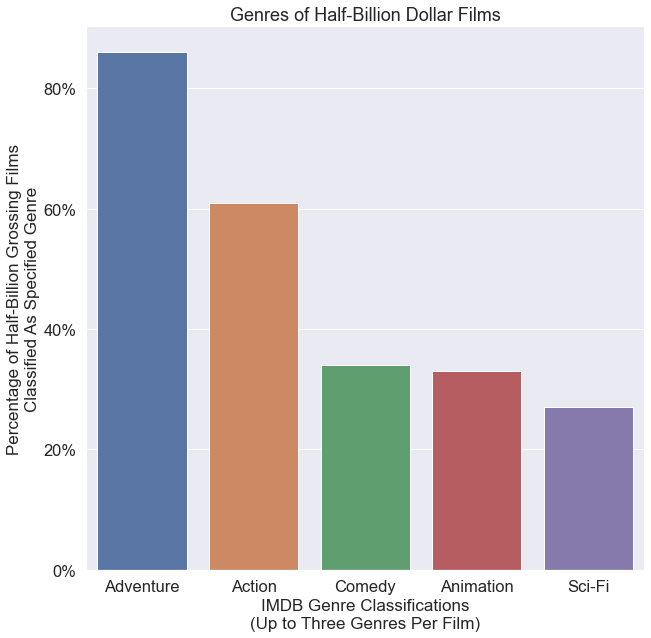

In [78]:
half_billion_counts_percent = half_billion_counts.copy()
genres, percent = half_billion_counts_percent.columns

half_billion_counts_percent[percent] = half_billion_counts_percent[percent]/len(half_billion)

plt.figure(figsize=(10, 10))
sns.set(font_scale = 1.5)

xlabel = 'IMDB Genre Classifications\n(Up to Three Genres Per Film)'
ylabel = 'Percentage of Half-Billion Grossing Films\nClassified As Specified Genre'
graphic_title = 'Genres of Half-Billion Dollar Films'

q1_ax = sns.barplot(y=percent,x=genres, data=half_billion_counts_percent.head())

#Formatting
q1_ax.set_xlabel(xlabel, fontsize = 17)
q1_ax.set_ylabel(ylabel, fontsize = 17)
q1_ax.set(title=graphic_title)
current_values = q1_ax.get_yticks()

q1_ax.set_yticklabels(['{:,.0%}'.format(x) for x in current_values]);


The results show that over half of the half-billion grossing films included the genres action and adventure.

# Question 1 Answered?

Question 1: What genres of film produce the highest box office revenue?

My analysis has answered this question as well as it can be, however the question itself has flaws. By IMDB’s own admission, most film genres are subjective. What one person finds funny, another might find disturbing. What one person finds adventurous, another finds timid. But if we accept the widely understood definitions of these classifications, then the analysis is sound. Action and adventure films do the best at the box office.

To parse genre considerations beyond generalities is an exercise in art criticism, not business analysis.

#        Question 2

Question 2: What is the best month to release a film in to generate the most revenue?

This question requires far less analysis. I'd like to look at it in two different ways. The first will be a histogram to see what months the half-billion grossing movies were released in. The second is a simple average of worldwide gross of all the films in the dataset binned by month.

I'll count the films by release month in two different dataframes, so first I'll define a function that performs this.

In [79]:
def release_month_count(df,div,sig):
    rt = df.groupby('tn_release_month')['tn_num_month','tn_domestic_gross',
                                        'tn_foreign_gross',
                                        'tn_worldwide_gross'].mean()
    
    #These two rows will be used in the next graphic
    #Count the total films in each month
    rt['count'] = df.groupby('tn_release_month')['title'].count()
    #Lets reduce the significant digits to make the graph more readable.
    #We'll go with millions of dollars.
    rt['count_percent'] = (rt['count']/len(df)).round(decimals=sig+2)
    
    
    cols = ['tn_domestic_gross','tn_foreign_gross','tn_worldwide_gross']

    rt[cols[0:3]] = ((rt[cols[0:3]]/div).round()).astype(int)
    rt.sort_values('tn_num_month',inplace=True)
    rt.reset_index(inplace=True)
    rt.drop(columns='tn_num_month',inplace=True)
    return rt

#The last two columns are not relevant to this graphic, so I'll skip them.
binned_by_month = release_month_count(dataset,1000000,1).iloc[:,0:4]
binned_by_month

<ipython-input-79-0f1e97393514>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  rt = df.groupby('tn_release_month')['tn_num_month','tn_domestic_gross',


,tn_release_month,tn_domestic_gross,tn_foreign_gross,tn_worldwide_gross
0,Jan,42,47,89
1,Feb,73,89,162
2,Mar,65,89,155
3,Apr,64,108,172
4,May,101,174,275
5,Jun,115,177,292
6,Jul,89,150,239
7,Aug,51,58,109
8,Sep,39,48,87
9,Oct,36,57,92


This shows that the biggest money makers of the year are released in the summer months of May, June and July.

#        Graphic 2

<ipython-input-80-ae61bc86d138>:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  q2_ax1.set_yticklabels(['${:.0f}m'.format(x) for x in current_values]);


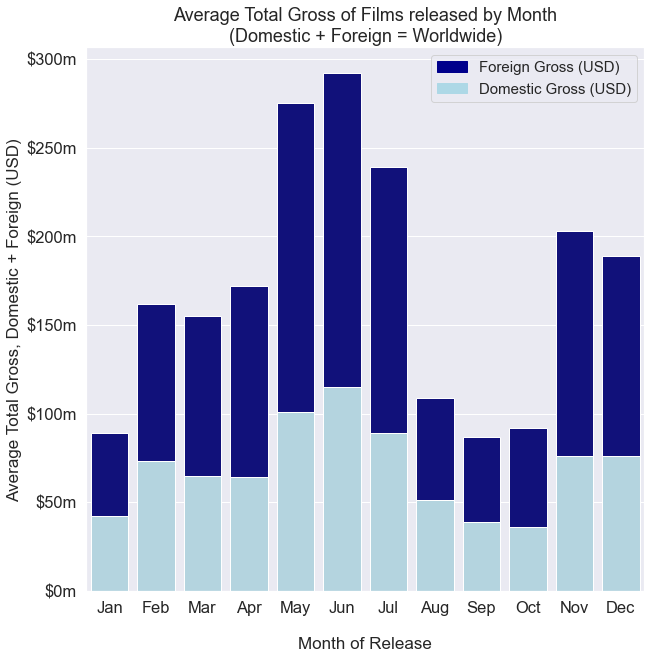

In [80]:
#Shorthand for the column names
mon, dom, fgn, wor = binned_by_month.columns

#Labels
title = "Average Total Gross of Films released by Month\n(Domestic + Foreign = Worldwide)"
xlabel = '\nMonth of Release'
ylabel = 'Average Total Gross, Domestic + Foreign (USD)'

# set the figure size
plt.figure(figsize=(10, 10))

# top bar → take only worldwide values from the data
total = binned_by_month[[mon,wor]]

# bar chart 1 → top bars (group of worldwide total)
q2_ax1 = sns.barplot(x=mon,  y=wor, data=total, color='darkblue')

# bottom bar → take only domestic values from the data
domestic = binned_by_month[[mon,dom,wor]]

# bar chart 2 → bottom bars (group of domestic)
q2_ax2 = sns.barplot(x=mon, y=dom, data=domestic, estimator=sum, ci=None,  color='lightblue')

# add legend
top_bar = mpatches.Patch(color='darkblue', label='Foreign Gross (USD)')
bottom_bar = mpatches.Patch(color='lightblue', label='Domestic Gross (USD)')
plt.legend(handles=[top_bar, bottom_bar], fontsize = 15)
q2_ax1.set_xlabel(xlabel, fontsize = 17)
q2_ax1.set_ylabel(ylabel, fontsize = 17)
q2_ax1.set(title=title)

#Setting up the Y-axis tick marks
current_values = q2_ax1.get_yticks()
current_values[:]=current_values[:]
q2_ax1.set_yticklabels(['${:.0f}m'.format(x) for x in current_values]);

# show the graph
plt.show()

The graph shows foreign and domestic, which add together to get the worldwide gross. 

There are two seasons a year that offer the greatest revenue potential for a movie release:
1. May–July 
2. November–December.

Now I'm going to show how many of the half a billion films were released for each month of the year. 

Even though we've used all bar charts so far, this plot should also be a bar chart because it fits the data.

In [81]:
binned_by_month_half_billion = release_month_count(half_billion,1000000,0)[['tn_release_month','count_percent']]
binned_by_month_half_billion

<ipython-input-79-0f1e97393514>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  rt = df.groupby('tn_release_month')['tn_num_month','tn_domestic_gross',


,tn_release_month,count_percent
0,Jan,0.01
1,Feb,0.03
2,Mar,0.08
3,Apr,0.05
4,May,0.13
5,Jun,0.20
6,Jul,0.15
7,Aug,0.03
8,Sep,0.01
9,Oct,0.03


#        Graphic 3

<ipython-input-82-0c81eb6accd6>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  q2_ax2.set_yticklabels(['{:,.0%}'.format(x) for x in current_values]);


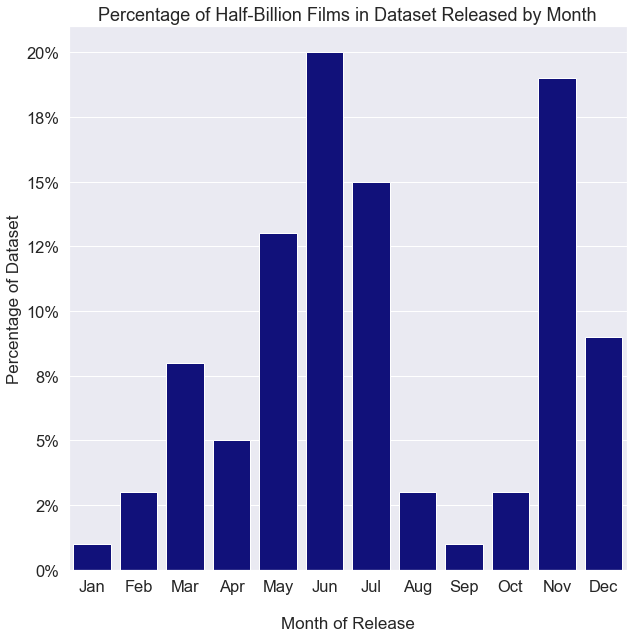

In [82]:
#Shorthand for column names
mon, per = binned_by_month_half_billion.columns

#Labels
title = "Percentage of Half-Billion Films in Dataset Released by Month"
xlabel = '\nMonth of Release'
ylabel = 'Percentage of Dataset'

# set the figure size
plt.figure(figsize=(10, 10))

# bar chart 1 → top bars (group of worldwide total)
q2_ax2 = sns.barplot(x=mon,  y=per, data=binned_by_month_half_billion, color='darkblue')

#Formatting
q2_ax2.set_xlabel(xlabel, fontsize = 17)
q2_ax2.set_ylabel(ylabel, fontsize = 17)
q2_ax2.set(title=title)
current_values = q2_ax2.get_yticks()
q2_ax2.set_yticklabels(['{:,.0%}'.format(x) for x in current_values]);

# show the graph
plt.show();

The half-billion dollar films follow the same release season trends. 

However, it’s worth noting that there are films that made half a billion dollars that were released during the slowest months of the year. So it is possible to make half a billion even in off season months.

# Question 2 Answered?

Question 2: What is the best month to release a film to generate the most revenue?

The business question has been answered as well as it can be with the data given, however, more analysis needs to be done to choose a release date for a film.

This question ignores a lot of outside factors regarding release dates. A more thorough analysis would be to separate the films by week instead of month, but even that doesn’t go far enough. There are so many events that occur outside of a regular calendar year. It could be that a popular video game was released one week, so people stayed home rather than pay for a film. Also, choosing a release date needs to consider what the competition is doing. We don’t want to release a movie that targets the same audience as a Marvel film the same week a Marvel film debuts.

#        Question 3

Question 3: What writers, directors, producers, actors and actresses have the highest revenue earning potential?

To answer this question, once again, I need to answer it two ways. The first is which category is most consistent, writer, director, producer or actor. Then, I can list the top ten talent with the highest revenue yield in each category.

The writers job has a lot of bad information in it. It contains people who get credit for creating characters that are featured in the mega popular superhero films, but the character creators didn't write the movie at all. Unfortunately, there's no way to isolate the screenwriters, so instead I'll just take people who have at least three films on their resume. I'll do this for all creatives.

So, I'll add a column that I'll use to count the films a person has worked on, and then use that to filter the data.

In [83]:
def counting_films(df):
    new = df.groupby('person_id')['movie_id','primary_name'].count()
    new.rename(columns = {'movie_id' :'film_count'}, inplace=True)
    df = pd.merge(df,new['film_count'], how='inner',left_on='person_id', right_on='person_id')
    return df

writers = counting_films(writers)
directors = counting_films(directors)
producers = counting_films(producers)
actors = counting_films(actors)
actresses = counting_films(actresses)
actorsneutral = counting_films(actorsneutral)
writers

<ipython-input-83-bfdda0a7229d>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  new = df.groupby('person_id')['movie_id','primary_name'].count()


,index,movie_id,ordering,person_id,category,job,characters,primary_name,death_year,film_count
0,6787,tt0359950,6.0,nm0862122,writer,based on the short story by,None,James Thurber,1961.0,1
1,6784,tt0359950,5.0,nm0175726,writer,screenplay by,None,Steve Conrad,NaN,3
2,6785,tt2358925,6.0,nm0175726,writer,written by,None,Steve Conrad,NaN,3
3,6786,tt2543472,6.0,nm0175726,writer,screenplay by,None,Steve Conrad,NaN,3
4,1898,tt0365907,6.0,nm0088747,writer,based on the novel by,None,Lawrence Block,NaN,1
...,...,...,...,...,...,...,...,...,...,...
2203,9258,tt7349662,9.0,nm9259302,writer,based on the book by,None,Ron Stallworth,NaN,1
2204,9310,tt7388562,6.0,nm3885256,writer,None,None,Terence Berden,NaN,1
2205,9293,tt7535780,3.0,nm0434525,writer,short story,None,Franz Kafka,1924.0,1
2206,9240,tt7784604,NaN,nm4170048,writer,NaN,NaN,Ari Aster,NaN,1


Now I need to add the film grossing information to that personnel data.

In [84]:
def add_movie_stats(org,cls,div):
    new = pd.merge(org,dataset[cls+['movie_id']], how='inner',left_on='movie_id', right_on='movie_id')
    new[cls] = (new[cls]/div).round(0)
    return new
    
cols = ['tn_worldwide_gross']
divisor = 1000000
writers = add_movie_stats(writers,cols,divisor)
directors = add_movie_stats(directors,cols,divisor)
producers = add_movie_stats(producers,cols,divisor)
actors  = add_movie_stats(actors,cols,divisor)
actresses = add_movie_stats(actresses,cols,divisor)
actorsneutral = add_movie_stats(actorsneutral,cols,divisor)

We can't hire dead people, so let's get them out of the dataset.

In [85]:
writers_alive = writers[writers['death_year'].isna()]
directors_alive = directors[directors['death_year'].isna()]
producers_alive = producers[producers['death_year'].isna()]
actors_alive = actors[actors['death_year'].isna()]
actresses_alive = actresses[actresses['death_year'].isna()]
actorsneutral_alive = actorsneutral[actorsneutral['death_year'].isna()]

Now I need to see how the top creatives' averages differ.

In [86]:
def top(df,floor,num,label):
    new = df[df['film_count'].map(lambda x : True if x>=floor else False)]
    tops = new.groupby('primary_name')[['tn_worldwide_gross']].mean().sort_values('tn_worldwide_gross',ascending=False).head(num)
    tops['tn_worldwide_gross'] = tops['tn_worldwide_gross'].round(0).astype(int)
    last = pd.merge(tops,df[['primary_name','film_count']], how='left',left_on='primary_name', right_on='primary_name')
    last.rename(columns={'primary_name':label+"'s name",'tn_worldwide_gross' : label+"'s Gross",'film_count':label+"'s film credits"},inplace=True)
    last = last[~last.duplicated()].reset_index(drop=True)
    return last.reset_index()

#Here I define the minimum number of films a creative must have credited to
#them in order to be included in the dataset.
the_floor = 3
#This variable decides the number of creatives analyzed for each category.
the_top = 50

writers_top = top(writers_alive,the_floor,the_top,'Writer')
directors_top = top(directors_alive,the_floor,the_top,'Director')
producers_top = top(producers_alive,the_floor,the_top,'Producer')
actors_top = top(actors_alive,the_floor,the_top,'Actor')
actresses_top = top(actresses_alive,the_floor,the_top,'Actress')
actorsneutral_top = top(actorsneutral_alive,the_floor,the_top,'(Gender Inclusive) Actor')

Now I'll put the various averages into a single table.

In [87]:
#Since each dataframe I'm merging has exactly 50 rows, we can merge by index.
def merging(df1,df2):
    tem = pd.merge(df1,df2,how='inner',left_on='index',right_on='index')
    return tem

#Now I'll merge all six dataframes together so I can perform calculations
#on all three at once.
temp1 = merging(writers_top,directors_top)
temp2 = merging(producers_top,actors_top)
temp3 = merging(actresses_top,actorsneutral_top)
temp4 = merging(temp1,temp2)
all_creatives = merging(temp4,temp3)

#This defines which rows I need for the graphic
des_rows = ["Writer's Gross","Director's Gross","Producer's Gross",
            "Actor's Gross","Actress's Gross",
            "(Gender Inclusive) Actor's Gross"]

#Now I'll average all the totals together
all_creatives_average = pd.DataFrame(all_creatives[des_rows].mean()
                                     .round(0).astype(int))
all_creatives_average.reset_index(inplace=True)
all_creatives_average.rename(columns={'index':'Creative Jobs',
                                      0:"Top "+str(the_top)+
                                      " Average gross ($MM)"},inplace=True)
all_creatives_average

,Creative Jobs,Top 50 Average gross ($MM)
0,Writer's Gross,603
1,Director's Gross,403
2,Producer's Gross,388
3,Actor's Gross,484
4,Actress's Gross,306
5,(Gender Inclusive) Actor's Gross,513


#        Graphic 4

Now for the graphic

<ipython-input-88-558eaa8ba329>:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  q3_ax.set_yticklabels(['${:.0f}m'.format(x) for x in current_values]);


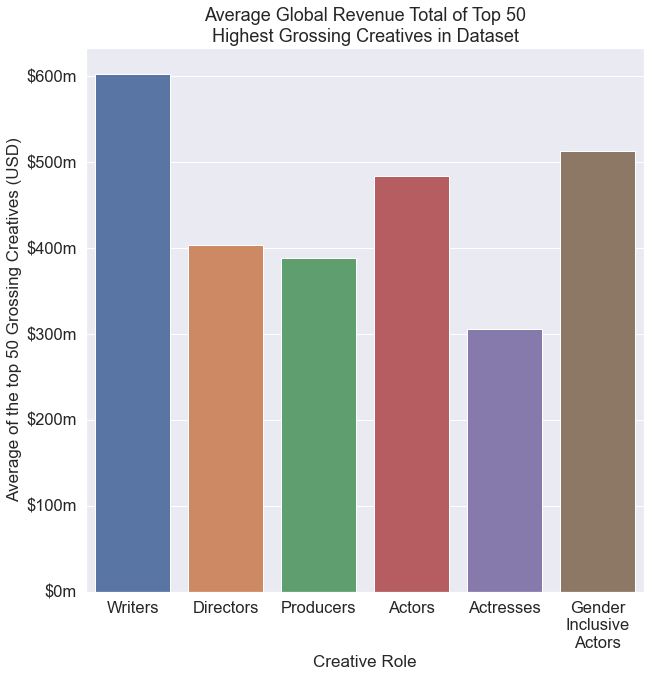

In [88]:
#Shorthand column labels
job, grs = all_creatives_average.columns

#Copy so I can change the dataframe just for this graphic
creatives_gross_graphic = all_creatives_average.copy()

#Labels (abb is abbreviated)
abb_rows = ['Writers','Directors','Producers','Actors',
            'Actresses','Gender\nInclusive\nActors']
#This for loop and corresponding dataframe command labels the graphic
#as specified above
row_change = {}
for i in range(len(des_rows)):
    row_change[des_rows[i]]=abb_rows[i]
creatives_gross_graphic['Creative Jobs'] = creatives_gross_graphic['Creative Jobs'].map(lambda x: row_change[x])

#More labeling
xlabel = "Creative Role"
ylabel = "Average of the top " +str(the_top)+" Grossing Creatives (USD)"
title = "Average Global Revenue Total of Top " +str(the_top)+"\nHighest Grossing Creatives in Dataset"

#Setting the plot size
plt.figure(figsize=(10, 10))
sns.set(font_scale = 1.5)

#Creating the plot
q3_ax = sns.barplot(y=grs,x=job, data=creatives_gross_graphic)

#Formatting
q3_ax.set_xlabel(xlabel, fontsize = 17)
q3_ax.set_ylabel(ylabel, fontsize = 17)
q3_ax.set(title=title)

#Setting up the Y-axis tick marks
current_values = q3_ax.get_yticks()
current_values[:]=current_values[:]
q3_ax.set_yticklabels(['${:.0f}m'.format(x) for x in current_values]);

According to the data, writers and actors have the largest impact on a film's total gross, so I'd recommend hiring some big names in those two categories. Despite the data, I highly reccomend pay equality between actors and actresses. We cannot make popular movies without actresses. We should pay them well. Also, if it gets out that your film studio does not have pay equality between men and women, the public will not be happy.

Anyway, with this in mind, I'll list the top ten highest grossing creatives in the categories of writers, actors and actresses.

# Graphic 5

In [89]:
all_creatives.rename(columns = {'index':'Rank'},inplace=True)
all_creatives['Rank'] = all_creatives['Rank'] + 1
top_ten = all_creatives[["Rank","Writer's name","Actor's name","Actress's name"]].head(10)
top_ten

,Rank,Writer's name,Actor's name,Actress's name
0,1,Guillermo del Toro,Richard Armitage,Sandra Bullock
1,2,Christopher Markus,Ian McKellen,Bryce Dallas Howard
2,3,Stephen McFeely,Robert Downey Jr.,Evangeline Lilly
3,4,Derek Connolly,Chris Evans,Scarlett Johansson
4,5,David S. Goyer,Chris Pratt,Eloise Mumford
5,6,Chris McKenna,Chris Hemsworth,Anne Hathaway
6,7,Erik Sommers,Benjamin Bratt,Holly Hunter
7,8,Philippa Boyens,Andy Serkis,Judi Dench
8,9,Fran Walsh,Mark Ruffalo,Angelina Jolie
9,10,Suzanne Collins,Martin Freeman,Emily Mortimer


These are the highest earning writers, actors and actresses in our dataset.

It's worth noting that each film project has different factors for choosing the right creatives. You cannot just pick a few of the names at the top and expect a smash success.

# Question 3 Answered?

Question 3: What writers, directors, producers, actors and actresses have the highest revenue earning potential?

Similar to month, there are many other factors to consider when hiring writers and actors. For starters, is someone who pays to go see Hobbit 2: Desolation of Smaug really going because Evangeline Lilly is in the film, or are they going to see a fantasy adventure film set in the same world as the Lord of the Rings films they saw when they were eleven? Considering how much pull a writer or actor has on an audience has its natural limits.

That being said, we do know which creatives had starring roles in the highest grossing films, but we don’t know how prominent a role the actors played in the film, or how the marketing pushed each film.

We do know which creatives had starring roles in the highest grossing films, but we don’t know how prominent a role the actors played in the film, or how the marketing advertised each film. Was the film billed as the latest thriller from Steven Spielberg, the latest Star Wars Movie, or Angelina Jolie’s role of her career? 

We know which people were attached to the highest-grossing films ever released, but we don’t know how much draw their names had to the audience.


#        Conclusion

The analysis I’ve done leads to these three conclusions:

1. The public likes action and adventure films. 
2. The best release windows are May–July and November–December.
3. Writers and actors are the best creative personnel to increase a films revenue potential.

This analysis is limited by time and budget. There are many other factors to consider when trying to launch a film business. Some areas to consider looking into before producing a film are:

1. How much do existing franchises influence the public’s film choices?
2. If existing film franchises have a lot of draw, does the public have the appetite for more after they’ve already spent a lot of time and money on the existing franchises?
3. Should Microsoft find an existing property and option it for film or start new?
4. Is streaming a better option for building the brand and generating revenue?
5. Should Microsoft purchase one of the big studios instead of entering the competition?

I think more time spent in answering the questions above would go a long way in helping Microsoft be successful with their film aspirations.
